In [40]:
import numpy as np

In [18]:
import json
f = open("../../../spotify/challenge.v1/challenge_set.json")
js = f.read()
challenge_set = json.loads(js)
f.close()

In [19]:
# challenge_set categories
# 1. Predict tracks for a playlist given its title only
# 2. Predict tracks for a playlist given its title and the first track
# 3. Predict tracks for a playlist given its title and the first 5 tracks
# 4. Predict tracks for a playlist given its first 5 tracks (no title)
# 5. Predict tracks for a playlist given its title and the first 10 tracks
# 6. Predict tracks for a playlist given its first ten tracks (no title)
# 7. Predict tracks for a playlist given its title and the first 25 tracks
# 8. Predict tracks for a playlist given its title and 25 random tracks
# 9. Predict tracks for a playlist given its title and the first 100 tracks
# 10.Predict tracks for a playlist given its title and 100 random tracks
categories = {"cat1":{}, "cat2":{}, "cat3":{}, "cat4":{}, "cat5":{},
              "cat6":{}, "cat7":{}, "cat8":{}, "cat9":{}, "cat10":{}
             }

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib and allow it to plot inline
%matplotlib inline
# seaborn can generate several warnings, we ignore them
import warnings 
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":20,"axes.titlesize":4,"axes.labelsize":24}) 

In [21]:
import emoji
import regex as re 


def extract_emojis(str):
  return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)

def remove_emojis(string):
    """
    it should remove all the emojis. 
    """
    tmp = string
#     RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
#     RE_EMOJI.sub(r'', tmp)
    emoji_pattern = re.compile("["
                           u"\U00010000-\U0010ffff"  # emoticons
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f3fb-\U0001f3ff" #skin tones
                           "]+", flags=re.UNICODE)
    
    tmp = emoji_pattern.sub(u'', tmp)
    return tmp

In [22]:
count = 0 
for playlist in challenge_set['playlists']:
    if 'name' in playlist:
        string_only_emojis = extract_emojis(str(playlist['name']))
        if string_only_emojis:
            tmp = str(playlist['name'])
            tmp = remove_emojis(tmp)
            print(playlist['name'],"\t>>>>>\t",string_only_emojis,"\t>>>>\t", tmp )
            count+=1
            
print(count)


# easy way to just count them: 
# names = df['name'].tolist()
# names_with_emoji = list(filter(None, map(extract_emojis, names) ))
# print(emojis[i], len(names_with_emoji))


🤙🏻 	>>>>>	 🤙🏻 	>>>>	 
😍😍😍 	>>>>>	 😍😍😍 	>>>>	 
🤘🏼🤘🏼 	>>>>>	 🤘🏼🤘🏼 	>>>>	 
💕💕 	>>>>>	 💕💕 	>>>>	 
❤️ 	>>>>>	 ❤ 	>>>>	 
🔥🔥🔥 	>>>>>	 🔥🔥🔥 	>>>>	 
☺️ 	>>>>>	 ☺ 	>>>>	 
Fire🔥 	>>>>>	 🔥 	>>>>	 Fire
Workout!💪🏼 	>>>>>	 💪🏼 	>>>>	 Workout!
💃🏽 	>>>>>	 💃🏽 	>>>>	 
☕️ 	>>>>>	 ☕ 	>>>>	 
💚💚💚 	>>>>>	 💚💚💚 	>>>>	 
Christmas🎄 	>>>>>	 🎄 	>>>>	 Christmas
🔥lit🔥 	>>>>>	 🔥🔥 	>>>>	 lit
lit🔥 	>>>>>	 🔥 	>>>>	 lit
💩💩 	>>>>>	 💩💩 	>>>>	 
❤️❤️❤️❤️❤️ 	>>>>>	 ❤❤❤❤❤ 	>>>>	 
🚗🚗 	>>>>>	 🚗🚗 	>>>>	 
☠️ 	>>>>>	 ☠ 	>>>>	 
👌🏼👌🏼 	>>>>>	 👌🏼👌🏼 	>>>>	 
🔥🔥🔥 	>>>>>	 🔥🔥🔥 	>>>>	 
😋😋 	>>>>>	 😋😋 	>>>>	 
Christmas🎄 	>>>>>	 🎄 	>>>>	 Christmas
✈️ 	>>>>>	 ✈ 	>>>>	 
Christmas🎄 	>>>>>	 🎄 	>>>>	 Christmas
💗💗💗 	>>>>>	 💗💗💗 	>>>>	 
Christmas🎄 	>>>>>	 🎄 	>>>>	 Christmas
❄️ 	>>>>>	 ❄ 	>>>>	 
🔥🔥🔥 	>>>>>	 🔥🔥🔥 	>>>>	 
summer☀️ 	>>>>>	 ☀ 	>>>>	 summer
rap🔥 	>>>>>	 🔥 	>>>>	 rap
🔥🔥🔥 	>>>>>	 🔥🔥🔥 	>>>>	 
🔥🔥 	>>>>>	 🔥🔥 	>>>>	 
christmas🎄 	>>>>>	 🎄 	>>>>	 christmas
❤❤ 	>>>>>	 ❤❤ 	>>>>	 
⚓️ 	>>>>>	 ⚓ 	>>>>	 
🤘🏻 	>>>>>	 🤘🏻 	>>>>	 
🔥LIT🔥 	>>>>>	 🔥🔥 	>>>>	 LIT
🤙🏼 	>

In [25]:
emoji_title_counters = [0] *10
hold_tot = [0] *10

for playlist in challenge_set['playlists']:
    title = 'name' in playlist.keys()
    ntracks = playlist['num_tracks']
    nsamples = playlist['num_samples']
    pid = playlist['pid']
    poslist = []
    
    for track in playlist['tracks']:
        pos = track['pos']
        poslist.append(pos)
    
    
    if title:
        #to count if the title has emojis 
        string_without_emojis = extract_emojis(str(playlist['name']))
        if string_without_emojis:
            to_add = 1 #to be added in the category counter
        else:
            to_add = 0 
        
        
            
        # cat1
        if nsamples == 0:
            categories['cat1'][pid] = ntracks
            category = 0
        # cat2
        if nsamples == 1:
            categories['cat2'][pid] = ntracks
            category = 1
        # cat3
        if nsamples == 5:
            categories['cat3'][pid] = ntracks
            cagegory=2
        # cat5
        if nsamples == 10:
            categories['cat5'][pid] = ntracks
            category = 4
        # cat7 or cat8
        if nsamples == 25:
            # cat7
            if max(poslist) < nsamples:
                categories['cat7'][pid] = ntracks
                category =6
            else:
            # cat8
                categories['cat8'][pid] = ntracks
                category=7
        # cat9 or cat10
        if nsamples == 100:
            # cat9
            if max(poslist) < nsamples:
                categories['cat9'][pid] = ntracks
                category =8
            # cat10
            else:
                categories['cat10'][pid] = ntracks
                category=9
    else:
        # cat4
        if nsamples == 5:
            categories['cat4'][pid] = ntracks
            category=3
        # cat6
        if nsamples == 10:
            categories['cat6'][pid] = ntracks
            category=5
    
    emoji_title_counters[category]+=to_add
    
print("number of emojis in titles per category\t",emoji_title_counters)

number of emojis in titles per category	 [41, 14, 0, 0, 14, 0, 26, 16, 17, 20]


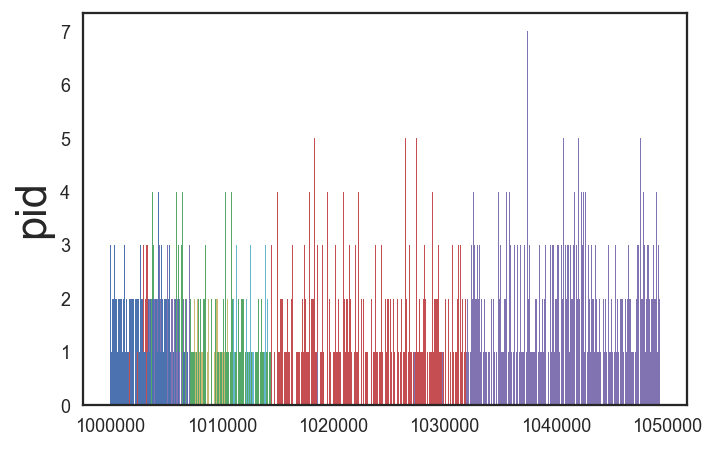

In [62]:

plt.figure(dpi=130)
plt.hist(list(categories['cat1'].keys()), bins=1000)
plt.hist(list(categories['cat2'].keys()), bins=1000)
plt.hist(list(categories['cat3'].keys()), bins=1000)
plt.hist(list(categories['cat4'].keys()), bins=1000)
plt.hist(list(categories['cat5'].keys()), bins=1000)
plt.hist(list(categories['cat6'].keys()), bins=1000)
plt.hist(list(categories['cat7'].keys()), bins=1000)
plt.hist(list(categories['cat8'].keys()), bins=1000)
plt.hist(list(categories['cat9'].keys()), bins=1000)
plt.hist(list(categories['cat10'].keys()), bins=1000)

plt.ylabel('pid')
plt.show()

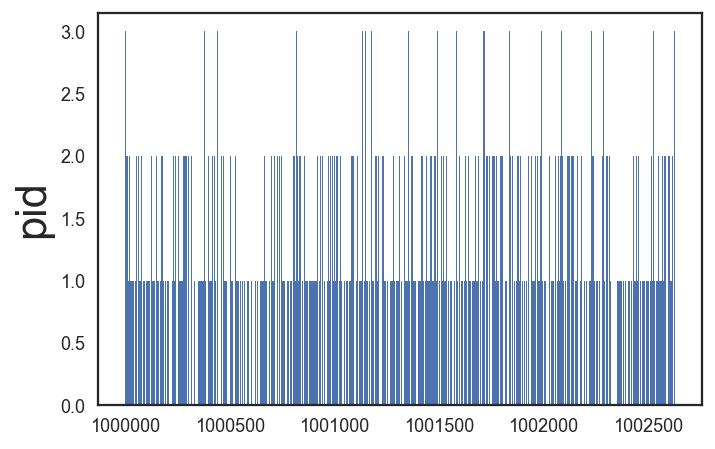

In [64]:

plt.figure(dpi=130)
plt.hist(list(categories['cat1'].keys()), bins=1000, histtype='bar', stacked=True)
plt.ylabel('pid')
plt.show()

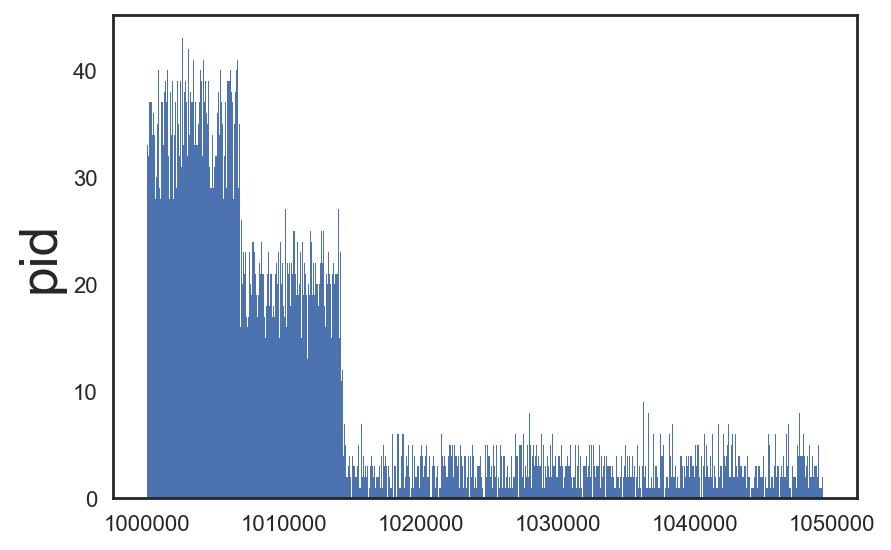

In [73]:
total = list()
total= total + list(categories['cat1'].keys()) + list(categories['cat2'].keys()) + list(categories['cat3'].keys())  + list(categories['cat4'].keys()) + list(categories['cat5'].keys()) + list(categories['cat6'].keys()) + list(categories['cat7'].keys())+ list(categories['cat8'].keys()) + list(categories['cat9'].keys()) + list(categories['cat10'].keys())

plt.figure(dpi=160)
plt.hist(total, bins=1000, histtype='bar', stacked=True)
plt.ylabel('pid')
plt.show()

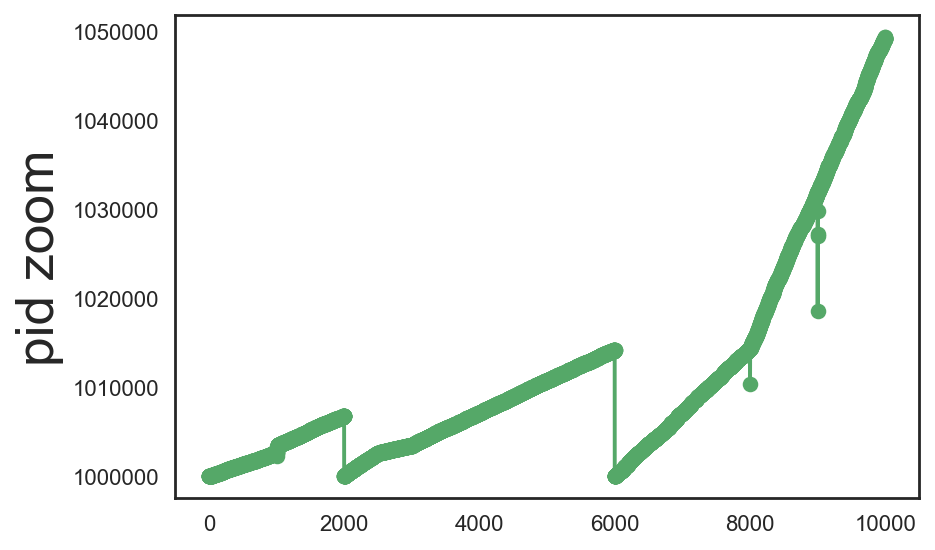

In [125]:
total = list()
total= total + list(categories['cat1'].keys()) + list(categories['cat2'].keys()) + list(categories['cat3'].keys())  + list(categories['cat4'].keys()) + list(categories['cat5'].keys()) + list(categories['cat6'].keys()) + list(categories['cat7'].keys())+ list(categories['cat8'].keys()) + list(categories['cat9'].keys()) + list(categories['cat10'].keys())

plt.figure(dpi=160)
plt.plot(total, 'go-' )
# plt.plot(list(categories['cat10'].keys()), 'rs')

# plt.scatter(total,np.arange(1010000,1020000), 10)
plt.ylabel('pid zoom')
plt.show()

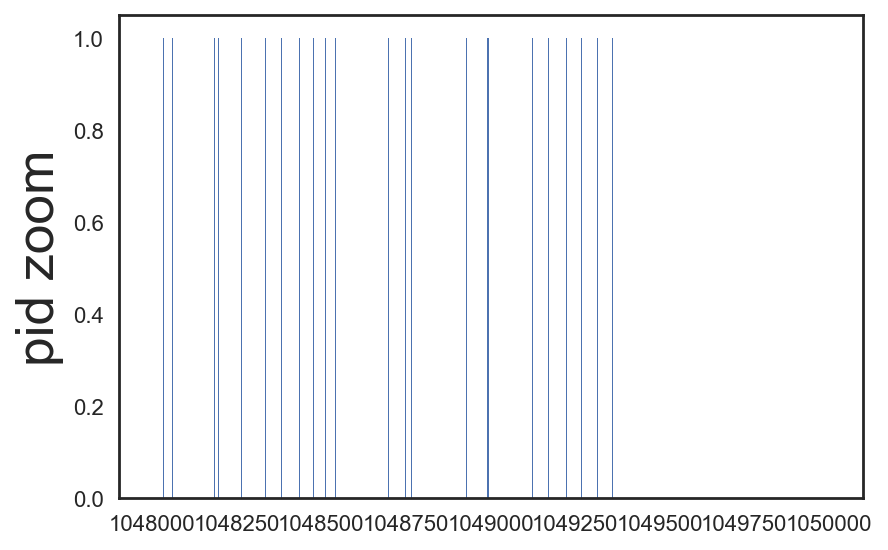

In [111]:

plt.figure(dpi=160)
plt.hist(total, bins= np.arange(1048003,1050003), histtype='bar', stacked=True)
plt.ylabel('pid zoom')
plt.show()

In [117]:

count=0
mins = [0]*11
maxs = [0]*11
flags= [True]*11

for playlist in challenge_set['playlists']:
    title = 'name' in playlist.keys()
    ntracks = playlist['num_tracks']
    nsamples = playlist['num_samples']
    pid = playlist['pid']
    poslist = []
    
    for track in playlist['tracks']:
        pos = track['pos']
        poslist.append(pos)
    
    
    if title:
        # cat1
        if nsamples == 0:
            i=1
            maxs[i]=count
            if flags[i]:
                mins[i]=count
                flags[i]=False
        # cat2
        if nsamples == 1:
            i=2
            maxs[i]=count
            if flags[i]:
                mins[i]=count
                flags[i]=False
        # cat3
        if nsamples == 5:
            i=3
            maxs[i]=count
            if flags[i]:
                mins[i]=count
                flags[i]=False
        # cat5
        if nsamples == 10:
            i=5
            maxs[i]=count
            if flags[i]:
                mins[i]=count
                flags[i]=False
        # cat7 or cat8
        if nsamples == 25:
            # cat7
            if max(poslist) < nsamples:
                i=7
                maxs[i]=count
                if flags[i]:
                    mins[i]=count
                    flags[i]=False
            else:
            # cat8
                i=8
                maxs[i]=count
                if flags[i]:
                    mins[i]=count
                    flags[i]=False
        # cat9 or cat10
        if nsamples == 100:
            # cat9
            if max(poslist) < nsamples:
                
                i=9
                maxs[i]=count
                if flags[i]:
                    mins[i]=count
                    flags[i]=False
            # cat10
            else:
                
                i=10
                maxs[i]=count
                if flags[i]:
                    mins[i]=count
                    flags[i]=False
    else:
        # cat4
        if nsamples == 5:
            i=4
            maxs[i]=count
            if flags[i]:
                mins[i]=count
                flags[i]=False
        # cat6
        if nsamples == 10:
            i=6
            maxs[i]=count
            if flags[i]:
                mins[i]=count
                flags[i]=False
    
    count+=1

In [122]:
mins

[0, 0, 9000, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]

In [123]:
maxs

[0, 999, 9999, 1999, 2999, 3999, 4999, 5999, 6999, 7999, 8999]

In [124]:
flags

[True, False, False, False, False, False, False, False, False, False, False]

In [ ]:
# How many playlist in each category?
for i in range(1, 11):
    cate = "cat" + str(i)
    keys = categories[cate].keys()
    num = 0
    for key in keys:
        num = num + 1
    print(cate + " has " + str(num) + " playlists\n")

In [ ]:
import matplotlib.pyplot as plt

cat1 = categories['cat1']
plt.bar(range(len(cat1)), cat1.values(), align='center')
plt.show()


In [ ]:
print (cat1)

In [ ]:
import numpy as np 
# challenge_set categories
# 1. Predict tracks for a playlist given its title only
# 2. Predict tracks for a playlist given its title and the first track
# 3. Predict tracks for a playlist given its title and the first 5 tracks
# 4. Predict tracks for a playlist given its first 5 tracks (no title)
# 5. Predict tracks for a playlist given its title and the first 10 tracks
# 6. Predict tracks for a playlist given its first ten tracks (no title)
# 7. Predict tracks for a playlist given its title and the first 25 tracks
# 8. Predict tracks for a playlist given its title and 25 random tracks
# 9. Predict tracks for a playlist given its title and the first 100 tracks
# 10.Predict tracks for a playlist given its title and 100 random tracks
means = list()
stds = list()

for i in range(1,11):
    cate = "cat" + str(i)
    
    max_ntracks = max(categories[cate].values())
    min_ntracks = min(categories[cate].values())
    
    means.append( np.mean(list(categories[cate].values())))
    stds.append(np.std(list(categories[cate].values())))

    print("num_tracks in " + cate + ": [ " + str(min_ntracks) + ", " + str(max_ntracks) + 
        " ]       mean:"+str(means[i-1])+"    std: "+str(stds[i-1])  + "       emojis:"+str(emoji_title_counters[i-1]))

In [ ]:
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(8, 6), dpi=90, facecolor='w', edgecolor='k')
plt.hist( list(categories['cat1'].values()), bins=4 ) #bins=range(10, 50)
plt.ylabel('cat1')
plt.show()

In [ ]:

plt.figure(num=None, figsize=(8, 6), dpi=90, facecolor='w', edgecolor='k')
arr = plt.hist( list(categories['cat2'].values()), bins=10) #bins=range(10, 80)
plt.ylabel('cat2')
for i in range(10):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.show()

a= list(categories['cat2' ].values()) 

print("==39  ", list(filter(lambda x: x ==39, a) ))
print("==40  ", list(filter(lambda x: x ==40, a) ))
print(">40   ",list(filter(lambda x: x >40, a) ))

In [ ]:

plt.figure(num=None, figsize=(8, 6), dpi=90, facecolor='w', edgecolor='k')
plt.hist( list(categories['cat3'].values()),bins=range(10, 91) )
plt.ylabel('cat3')
plt.show()



In [ ]:
bins=4
plt.figure(num=None, figsize=(8, 6), dpi=90, facecolor='w', edgecolor='k')
arr = plt.hist( list(categories['cat3'].values()), bins=bins) #bins=range(10, 80)
plt.ylabel('cat2')
for i in range(bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.show()
plt.show()


In [ ]:

cat31 = list(filter( lambda x: x<51, categories['cat3'].values()))
cat32 = list(filter( lambda x: x>50 and x<=75, categories['cat3'].values()))
cat33 = list(filter( lambda x: x>75, categories['cat3'].values()))
print( "under 51 ", len(cat31), np.mean(cat31), np.std(cat31))
print( "from  50 to 75 ", len(cat32), np.mean(cat32), np.std(cat32))
print( "above75 ",  len(cat33), np.mean(cat33), np.std(cat33))

In [ ]:

plt.figure(num=None, figsize=(8, 6), dpi=90, facecolor='w', edgecolor='k')
plt.hist( list(categories['cat4'].values()), bins= 4 )#bins= range(40,100)
plt.ylabel('cat4')
plt.show()

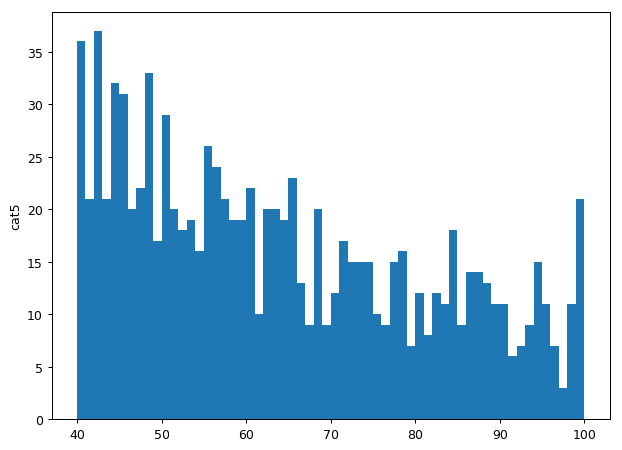

In [66]:

plt.figure(num=None, figsize=(8, 6), dpi=90, facecolor='w', edgecolor='k')
plt.hist( list(categories['cat5'].values()),bins= range(40,101) )
plt.ylabel('cat5')
plt.show()

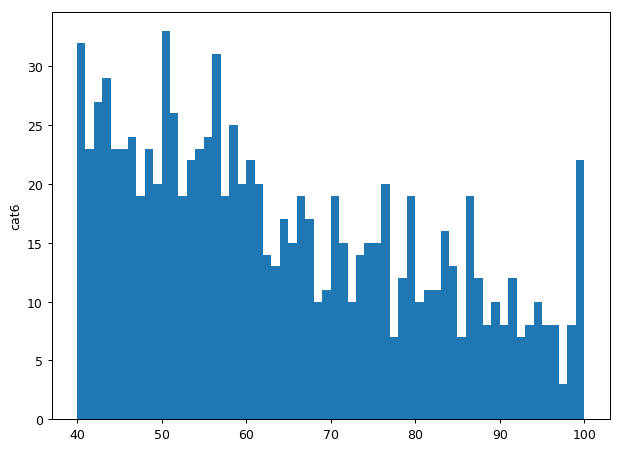

In [65]:
plt.figure(num=None, figsize=(8, 6), dpi=90, facecolor='w', edgecolor='k')
plt.hist( list(categories['cat6'].values()),bins=range(40,101) )
plt.ylabel('cat6')
plt.show()

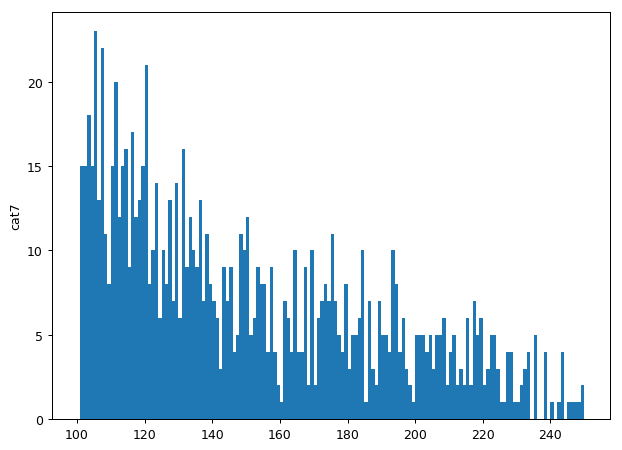

In [67]:
plt.figure(num=None, figsize=(8, 6), dpi=90, facecolor='w', edgecolor='k')
plt.hist( list(categories['cat7'].values()),bins=range(100,251) )
plt.ylabel('cat7')
plt.show()

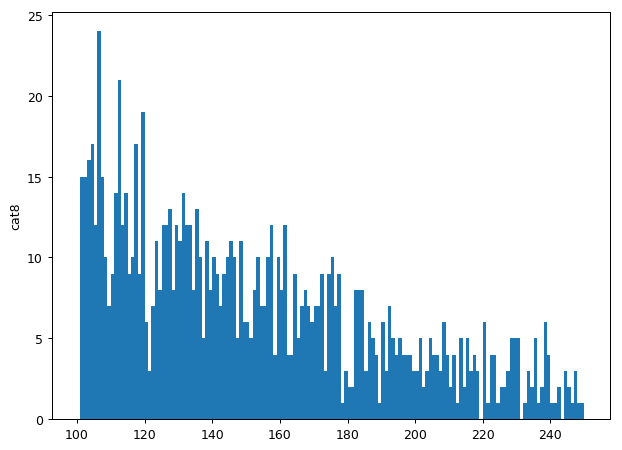

In [68]:
plt.figure(num=None, figsize=(8, 6), dpi=90, facecolor='w', edgecolor='k')
plt.hist( list(categories['cat8'].values()), bins=range(100,251) )
plt.ylabel('cat8')
plt.show()

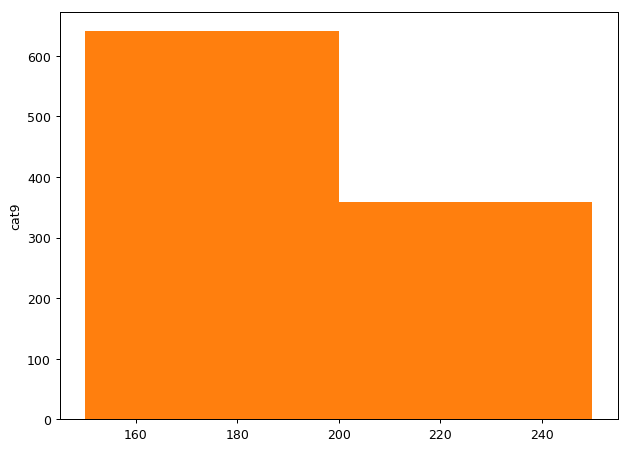

In [96]:
plt.figure(num=None, figsize=(8, 6), dpi=90, facecolor='w', edgecolor='k')
plt.hist( list(categories['cat9'].values()),bins=range(150,251) )
plt.hist( list(categories['cat9'].values()),bins=2)
plt.ylabel('cat9')
plt.show()

In [41]:
# iterate over MPD in order to collect info

# MPD categories, correspond to challenge_set categories
cates = {"c1":{}, "c2":{}, "c3":{}, "c4_6":{}, "c5":{}, "c7_8":{}, "c9_10":{}}

for i in range(0,1000):
    start = i * 1000
    end = start + 999
    path = "../../spotify/data/mpd.slice." + str(start) + "-" + str(end) + ".json"
    f = open(path)
    js = f.read()
    mdp_slice = json.loads(js)
    f.close()
    
    for playlist in mdp_slice['playlists']:
        title = 'name' in playlist.keys()
        pid = playlist['pid']
        ntracks = playlist['num_tracks']
        
        # c1, c2, c3, c4_6, c5, c7_8, c9_10
        if title:
            # c1
            if ntracks > 9 and ntracks < 51:
                 cates['c1'][pid] = ntracks
            # c2
            if ntracks > 9 and ntracks < 79:
                 cates['c2'][pid] = ntracks
            # c3
            if ntracks > 9 and ntracks < 101:
                 cates['c3'][pid] = ntracks
            # c4_6, c5
            if ntracks > 39 and ntracks < 101:
                cates['c5'][pid] = ntracks
                cates['c4_6'][pid] = ntracks
            # c7_8
            if ntracks > 100 and ntracks < 251:
                 cates['c7_8'][pid] = ntracks
            # c9_10
            if ntracks > 149 and ntracks < 251:
                 cates['c9_10'][pid] = ntracks          
        else:
            # c4_6
            if ntracks > 39 and ntracks < 101:
                 cates['c4_6'][pid] = ntracks
    print("slice " + str(i) + " finished")

slice 0 finished
slice 1 finished
slice 2 finished
slice 3 finished
slice 4 finished
slice 5 finished
slice 6 finished
slice 7 finished


KeyboardInterrupt: 

In [40]:
count = {}
count['c1'] = len(cates['c1'].keys())
count['c2'] = len(cates['c2'].keys())
count['c3'] = len(cates['c3'].keys())
count['c4_6'] = len(cates['c4_6'].keys())
count['c5'] = len(cates['c5'].keys())
count['c7_8'] = len(cates['c7_8'].keys())
count['c9_10'] = len(cates['c9_10'].keys())
plt.bar(range(len(count)), count.values(), align='center')
plt.xticks(range(len(count)), list(count.keys()))

NameError: name 'cates' is not defined

In [127]:
print(count)

{'c1': 476438, 'c2': 656868, 'c3': 747510, 'c4_6': 374561, 'c5': 374561, 'c7_8': 216481, 'c9_10': 97256}


In [74]:


def generate_train(playlists):
    # define category range
    cates = {'cat1': (10, 50), 'cat2': (10, 78), 'cat3': (10, 100), 'cat4': (40, 100), 'cat5': (40, 100),
             'cat6': (40, 100),'cat7': (101, 250), 'cat8': (101, 250), 'cat9': (150, 250), 'cat10': (150, 250)}

    cat_pids = {}
    for cat, interval in cates.items():
        df = playlists[(playlists['num_tracks'] >= interval[0]) & (playlists['num_tracks'] <= interval[1])].sample(
            n=1000)
        cat_pids[cat] = list(df.pid)
        playlists = playlists.drop(df.index)

    playlists = playlists.reset_index(drop=True)

    return playlists, cat_pids

def generate_test(cat_pids, playlists, interactions):

    def build_df_none(cat_pids, playlists, cat, num_samples):
        df = playlists[playlists['pid'].isin(cat_pids[cat])]
        df = df[['pid', 'num_tracks']]
        df['num_samples'] = num_samples
        df['num_holdouts'] = df['num_tracks'] - df['num_samples']
        return df

    def build_df_name(cat_pids, playlists, cat, num_samples):
        df = playlists[playlists['pid'].isin(cat_pids[cat])]
        df = df[['name', 'pid', 'num_tracks']]
        df['num_samples'] = num_samples
        df['num_holdouts'] = df['num_tracks'] - df['num_samples']
        return df

    df_test_pl = pd.DataFrame()
    df_test_itr = pd.DataFrame()
    df_eval_itr = pd.DataFrame()

    for cat in list(cat_pids.keys()):
        if cat == 'cat1':
            num_samples = 0
            df = build_df_name(cat_pids, playlists, cat, num_samples)
            df_test_pl = pd.concat([df_test_pl, df])

            # all interactions used for evaluation
            df_itr = interactions[interactions['pid'].isin(cat_pids[cat])]
            df_eval_itr = pd.concat([df_eval_itr, df_itr])

            # clean interactions for training
            interactions = interactions.drop(df_itr.index)

            print("cat1 done")

        if cat == 'cat2':
            num_samples = 1
            df = build_df_name(cat_pids, playlists, cat, num_samples)
            df_test_pl = pd.concat([df_test_pl, df])

            df_itr = interactions[interactions['pid'].isin(cat_pids[cat])]
            # clean interactions for training
            interactions = interactions.drop(df_itr.index)
            df_sample = df_itr[df_itr['pos'] == 0]
            df_test_itr = pd.concat([df_test_itr, df_sample])
            df_itr = df_itr.drop(df_sample.index)
            df_eval_itr = pd.concat([df_eval_itr, df_itr])

            print("cat2 done")

        if cat == 'cat3':
            num_samples = 5
            df = build_df_name(cat_pids, playlists, cat, num_samples)
            df_test_pl = pd.concat([df_test_pl, df])

            df_itr = interactions[interactions['pid'].isin(cat_pids[cat])]

            # clean interactions for training
            interactions = interactions.drop(df_itr.index)

            df_sample = df_itr[(df_itr['pos'] >= 0) & (df_itr['pos'] < num_samples)]
            df_test_itr = pd.concat([df_test_itr, df_sample])
            df_itr = df_itr.drop(df_sample.index)
            df_eval_itr = pd.concat([df_eval_itr, df_itr])

            print("cat3 done")

        if cat == 'cat4':
            num_samples = 5
            df = build_df_none(cat_pids, playlists, cat, num_samples)
            df_test_pl = pd.concat([df_test_pl, df])

            df_itr = interactions[interactions['pid'].isin(cat_pids[cat])]
            # clean interactions for training
            interactions = interactions.drop(df_itr.index)

            df_sample = df_itr[(df_itr['pos'] >= 0) & (df_itr['pos'] < num_samples)]
            df_test_itr = pd.concat([df_test_itr, df_sample])
            df_itr = df_itr.drop(df_sample.index)
            df_eval_itr = pd.concat([df_eval_itr, df_itr])

            print("cat4 done")

        if cat == 'cat5':
            num_samples = 10
            df = build_df_name(cat_pids, playlists, cat, num_samples)
            df_test_pl = pd.concat([df_test_pl, df])

            df_itr = interactions[interactions['pid'].isin(cat_pids[cat])]
            # clean interactions for training
            interactions = interactions.drop(df_itr.index)

            df_sample = df_itr[(df_itr['pos'] >= 0) & (df_itr['pos'] < num_samples)]
            df_test_itr = pd.concat([df_test_itr, df_sample])
            df_itr = df_itr.drop(df_sample.index)
            df_eval_itr = pd.concat([df_eval_itr, df_itr])

            print("cat5 done")

        if cat == 'cat6':
            num_samples = 10
            df = build_df_none(cat_pids, playlists, cat, num_samples)
            df_test_pl = pd.concat([df_test_pl, df])

            df_itr = interactions[interactions['pid'].isin(cat_pids[cat])]
            # clean interactions for training
            interactions = interactions.drop(df_itr.index)

            df_sample = df_itr[(df_itr['pos'] >= 0) & (df_itr['pos'] < num_samples)]
            df_test_itr = pd.concat([df_test_itr, df_sample])
            df_itr = df_itr.drop(df_sample.index)
            df_eval_itr = pd.concat([df_eval_itr, df_itr])

            print("cat6 done")

        if cat == 'cat7':
            num_samples = 25
            df = build_df_name(cat_pids, playlists, cat, num_samples)
            df_test_pl = pd.concat([df_test_pl, df])

            df_itr = interactions[interactions['pid'].isin(cat_pids[cat])]
            # clean interactions for training
            interactions = interactions.drop(df_itr.index)

            df_sample = df_itr[(df_itr['pos'] >= 0) & (df_itr['pos'] < num_samples)]
            df_test_itr = pd.concat([df_test_itr, df_sample])
            df_itr = df_itr.drop(df_sample.index)
            df_eval_itr = pd.concat([df_eval_itr, df_itr])

            print("cat7 done")

        if cat == 'cat8':
            num_samples = 25
            df = build_df_name(cat_pids, playlists, cat, num_samples)
            df_test_pl = pd.concat([df_test_pl, df])

            df_itr = interactions[interactions['pid'].isin(cat_pids[cat])]
            # clean interactions for training
            interactions = interactions.drop(df_itr.index)

            for pid in cat_pids[cat]:
                df = df_itr[df_itr['pid'] == pid]
                df_sample = df.sample(n=num_samples)
                df_test_itr = pd.concat([df_test_itr, df_sample])
                df = df.drop(df_sample.index)
                df_eval_itr = pd.concat([df_eval_itr, df])

            print("cat8 done")

        if cat == 'cat9':
            num_samples = 100
            df = build_df_name(cat_pids, playlists, cat, num_samples)
            df_test_pl = pd.concat([df_test_pl, df])

            df_itr = interactions[interactions['pid'].isin(cat_pids[cat])]
            # clean interactions for training
            interactions = interactions.drop(df_itr.index)

            df_sample = df_itr[(df_itr['pos'] >= 0) & (df_itr['pos'] < num_samples)]
            df_test_itr = pd.concat([df_test_itr, df_sample])
            df_itr = df_itr.drop(df_sample.index)
            df_eval_itr = pd.concat([df_eval_itr, df_itr])

            print("cat9 done")

        if cat == 'cat10':
            num_samples = 100
            df = build_df_name(cat_pids, playlists, cat, num_samples)
            df_test_pl = pd.concat([df_test_pl, df])

            df_itr = interactions[interactions['pid'].isin(cat_pids[cat])]
            # clean interactions for training
            interactions = interactions.drop(df_itr.index)

            for pid in cat_pids[cat]:
                df = df_itr[df_itr['pid'] == pid]
                df_sample = df.sample(n=num_samples)
                df_test_itr = pd.concat([df_test_itr, df_sample])
                df = df.drop(df_sample.index)
                df_eval_itr = pd.concat([df_eval_itr, df])

            print("cat10 done")

    df_test_pl = df_test_pl.reset_index(drop=True)
    df_test_itr = df_test_itr.reset_index(drop=True)
    df_eval_itr = df_eval_itr.reset_index(drop=True)
    interactions = interactions.reset_index(drop=True)  # return as train_interactions

    return df_test_pl, df_test_itr, df_eval_itr, interactions

def split_dataset(df_playlists, df_interactions):
    """
    Split the MPD according to Challenge_set features
    :param df_playlists: DataFrame from "playlists.csv"
    :param df_interactions: DataFrame from "interactions.csv"
    :return: df_train_pl: a DataFrame with same shape as "playlists.csv" for training
             df_train_itr: a DataFrame with same shape as "interactions.csv" for training

             df_test_pl: a DataFrame of 10,000 incomplete playlists for testing
             df_test_itr: a DataFrame with same shape as " interactions.csv" for testing

             df_eval_itr: a DataFrame of holdout interactions for evaluation
    """
    df_train_pl, cat_pids = generate_train(df_playlists)
    df_test_pl, df_test_itr, df_eval_itr, df_train_itr = generate_test(cat_pids, df_playlists, df_interactions)

    return df_train_pl, df_train_itr, df_test_pl, df_test_itr, df_eval_itr

    

In [82]:
import numpy as np 
import pandas as pd 
playlists = pd.read_csv("../../dataset/playlists.csv", delimiter='\t')

df_train_pl, cat_pids = generate_train(playlists)



In [83]:
df_train_pl


,name,collaborative,pid,modified_at,num_albums,num_tracks,num_followers,num_tracks.1,num_edits,duration_ms,num_artists,description
0,Throwbacks,False,0,1493424000,47,52,1,52,6,11532414,37,NaN
1,Awesome Playlist,False,1,1506556800,23,39,1,39,5,11656470,21,NaN
2,korean,False,2,1505692800,51,64,1,64,18,14039958,31,NaN
3,mat,False,3,1501027200,107,126,1,126,4,28926058,86,NaN
4,90s,False,4,1401667200,16,17,2,17,7,4335282,16,NaN
5,Wedding,False,5,1430956800,71,80,1,80,3,19156557,56,NaN
6,I Put A Spell On You,False,6,1477094400,15,16,1,16,2,3408479,13,NaN
7,2017,False,7,1509321600,52,53,1,53,38,12674796,48,NaN
8,BOP,False,8,1508976000,37,46,2,46,21,9948921,23,NaN
9,old country,False,9,1501804800,20,21,1,21,10,4297488,18,NaN


In [84]:
cat_pids

{'cat1': [91817,
  481748,
  151234,
  27657,
  774003,
  599933,
  169425,
  723895,
  369259,
  674421,
  972769,
  82274,
  420190,
  374619,
  403790,
  313539,
  622521,
  606249,
  469823,
  391137,
  366918,
  481139,
  216989,
  413005,
  475743,
  432781,
  948352,
  652507,
  649931,
  890703,
  560727,
  858827,
  650688,
  553969,
  312056,
  881385,
  368436,
  992718,
  500621,
  895546,
  120422,
  515392,
  484948,
  449343,
  761590,
  868441,
  673226,
  983807,
  379156,
  489535,
  700723,
  585757,
  870139,
  480623,
  169903,
  213456,
  185748,
  760368,
  857265,
  94067,
  524522,
  747598,
  990222,
  938232,
  722252,
  789651,
  469499,
  883335,
  817527,
  741254,
  325565,
  321688,
  395666,
  726329,
  467675,
  628836,
  472275,
  687543,
  992772,
  876923,
  922280,
  572576,
  914747,
  146735,
  204932,
  614122,
  800044,
  52042,
  167181,
  797240,
  154990,
  904501,
  883536,
  503642,
  770495,
  491330,
  369288,
  106049,
  833813,
  75680

In [98]:
df = playlists[(playlists['num_tracks'] >= intervals[i][0]) & (playlists['num_tracks'] <= intervals[i][1])]
df

,name,collaborative,pid,modified_at,num_albums,num_tracks,num_followers,num_tracks.1,num_edits,duration_ms,num_artists,description
30,Garage Rock,False,30,1430265600,17,157,1,157,6,34463029,9,NaN
41,Belters,False,41,1496448000,105,209,1,209,13,49193451,55,NaN
42,Road Trippin',False,42,1490572800,131,158,2,158,51,33759110,106,NaN
55,Tennessee,False,55,1488844800,74,151,3,151,20,33994572,27,NaN
68,xx,False,68,1508976000,90,174,1,174,20,40691418,47,NaN
72,spanish jams,False,72,1471996800,139,197,1,197,22,44051231,83,NaN
95,roadtrippin,False,95,1506816000,133,170,1,170,50,40155045,90,NaN
97,2012,False,97,1346457600,56,233,1,233,16,54634292,42,NaN
103,latin,False,103,1508544000,133,177,1,177,28,43921538,63,NaN
115,beach,False,115,1507680000,148,194,4,194,48,43332923,102,NaN


In [218]:

def extract_emojis(string):
    try:
        return ''.join(c for c in str(string) if c in emoji.UNICODE_EMOJI)
    except TypeError:
        print('wattafak is dat',type(string), string)
        exit()


def check_conditions(df, mean, std, emojis, error=(0,0,0), skip_emojis=False):
    if not emojis:
        skip_emojis = True
    target_mean = np.mean(df['num_tracks'])
    
    print(df['num_tracks'])
    target_std = np.std(df['num_tracks'])
    names = df['name'].tolist()
    names_with_emoji = list(filter(None, map(extract_emojis, names)))
    
    target_emojis = len(names_with_emoji)

    if mean > (target_mean +error[0]) or mean< (target_mean - error[0]):
        print("error m ",mean,target_mean)
        return False
    if std > (target_std + error[1]) or std < (target_std - error[1]):
        print("error s ", std,target_std)
        return False
    if not skip_emojis:
        if emojis > (target_emojis +error[2]) or emojis<(target_emojis - error[2] ) :
            print("error e ",emojis,target_emojis)
            return False
    print("passed tests")
    print(mean, target_mean)
    print(std, target_std)
    if skip_emojis:
        return True
    print(emojis, target_emojis)
    return True
    

In [213]:

def get_random_df_constrained(source_df, num_of_pl, min_v, max_v, mean, std, emojis=False, errors=(2,3,3) ):
    
    while True:
        df = source_df[((source_df['num_tracks'])>= min_v ) & ((source_df['num_tracks'])<=min_v)].sample(n=num_of_pl)
        
        if check_conditions(df,mean= mean, std= std, emojis=emojis, error=errors):
            break
    print(df)
    print(type(df))
    return df
    

In [219]:

intervals =[(10, 50), (10, 40), (10, 100), (40, 100), (40, 100),(40, 100),(101, 250),(101, 250),(150, 250),(150, 250)]
means = [28.6, 23.8, 58.4, 63.1, 63.6, 63.6, 150.2, 151.7, 189.2, 187.5]
stds = [11.2, 8.7, 23.7, 16.58, 17.22, 16.79, 38.62, 38.58, 27.93, 26.98]
emojis = [23, 14, 18, 0, 14, 0, 26, 16, 17, 20]
seeds = [42]*10

# under 51  314 29.4458598726 11.4036506081
# from  50 to 75  425 62.0282352941 7.20517153757
# above75  261 87.4444444444 7.13430126757

# min, max, num_to_extract, mean, std
cates = {'cat1': (10, 50, 1000,28.6,11.2 ), 'cat2': (10, 40, 1000,23.8,8.7), 'cat31': (10, 50,314,29.4,11.4),
         'cat32':(51,75,425,62,7.2),'cat33':(75,100,261,87,7.1), 'cat4': (40, 100,1000,63,16.5),
         'cat5': (40, 100,1000,63.5,17.2),'cat6': (40, 100,1000,63.6,16.7),'cat7': (101, 250,1000,150,38.6), 
         'cat8': (101, 250,1000,151.7,38.6), 'cat9': (150, 250,1000,189,28), 'cat10': (150, 250,1000,187.5,27)}

print("Loading file:")
playlists = pd.read_csv("../../dataset/playlists.csv", delimiter='\t')
# interactions = pd.read_csv("../spotify/interactions.csv", delimiter='\t')

for cat, info in cates.items():
    print(cat)
    
    df = get_random_df_constrained(playlists, min_v=info[0],max_v=info[1],num_of_pl=info[2], mean=info[3], std=info[4],emojis=False, errors=(1,1,1))
#     print("quello vero  ",hash(df.values.tobytes()))
    print(type(df),df.head())
    cat_pids[cat] = list(df.pid)
    playlists = playlists.drop(df.index)

playlists = playlists.reset_index(drop=True)


Loading file:
cat1
711683    10
24836     10
723843    10
906314    10
318119    10
52947     10
501235    10
403908    10
783095    10
320469    10
90888     10
45155     10
392893    10
147313    10
617311    10
489308    10
145386    10
174174    10
720835    10
661607    10
251641    10
401342    10
48657     10
432817    10
286228    10
236349    10
77073     10
74788     10
86488     10
201656    10
          ..
513433    10
812816    10
918385    10
17244     10
503492    10
722092    10
680968    10
76545     10
587538    10
537913    10
194205    10
966854    10
18051     10
494799    10
384362    10
138592    10
671353    10
457505    10
166694    10
614980    10
986421    10
256130    10
631110    10
458431    10
649927    10
558496    10
557726    10
627394    10
510847    10
277184    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
16830     10
823668    10
258752    10
635846    10
487521    10
400982    10
740064    10
697526    10
897835    10
200047 

182909    10
360243    10
709014    10
840615    10
375381    10
341602    10
619216    10
218022    10
182116    10
437960    10
579858    10
465033    10
77812     10
892319    10
591679    10
592723    10
125978    10
400892    10
841541    10
154945    10
235477    10
930231    10
278316    10
55196     10
559981    10
877686    10
577168    10
735185    10
702486    10
258685    10
          ..
92490     10
992420    10
737888    10
194205    10
133597    10
843893    10
650888    10
52618     10
502014    10
147863    10
741456    10
130188    10
402696    10
918873    10
780763    10
133974    10
694044    10
343771    10
19555     10
654678    10
196406    10
747570    10
400622    10
975182    10
906773    10
641880    10
282611    10
234734    10
367671    10
675921    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
869636    10
226805    10
56508     10
526943    10
786238    10
497689    10
431557    10
174339    10
332246    10
928424    10
263644    10


302781    10
512082    10
781318    10
572401    10
566029    10
980473    10
553503    10
717080    10
177492    10
626991    10
13196     10
455076    10
638402    10
402240    10
251886    10
97507     10
914870    10
796063    10
34598     10
74125     10
167868    10
392415    10
553461    10
652720    10
626082    10
715002    10
708646    10
997875    10
504459    10
250941    10
          ..
618152    10
447696    10
24173     10
45599     10
942555    10
705861    10
495500    10
145764    10
524114    10
591551    10
641893    10
38849     10
971894    10
199087    10
259312    10
370993    10
296828    10
317376    10
280904    10
782506    10
158459    10
717407    10
45969     10
290394    10
659209    10
912328    10
404798    10
873613    10
166912    10
615967    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
957733    10
38609     10
370999    10
876470    10
192689    10
170883    10
101697    10
391090    10
895329    10
170082    10
79374     10


152376    10
88824     10
61543     10
556898    10
90888     10
589352    10
300726    10
790545    10
602306    10
381865    10
348304    10
105556    10
196691    10
324207    10
396218    10
778288    10
131543    10
481352    10
458718    10
236027    10
264971    10
95661     10
755926    10
986429    10
561531    10
626082    10
581876    10
878112    10
754287    10
867765    10
          ..
964288    10
462692    10
206792    10
514087    10
633917    10
268635    10
326384    10
263039    10
480771    10
732081    10
509261    10
238969    10
450109    10
350016    10
619981    10
13086     10
578204    10
681360    10
447969    10
769091    10
29294     10
371000    10
877694    10
506244    10
800172    10
944163    10
541492    10
731953    10
259985    10
754624    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
488164    10
701833    10
228092    10
719866    10
584314    10
135820    10
879108    10
958318    10
686918    10
683127    10
742761    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
623038    10
7746      10
818296    10
713582    10
948502    10
184752    10
920768    10
581825    10
287891    10
812816    10
737241    10
968287    10
832757    10
664766    10
501235    10
169158    10
817807    10
250759    10
922219    10
360523    10
841576    10
10420     10
908598    10
716041    10
611030    10
69707     10
888765    10
79173     10
656681    10
536742    10
          ..
109972    10
29565     10
60051     10
591679    10
50349     10
47050     10
595617    10
939757    10
915448    10
715671    10
632788    10
13114     10
905661    10
127920    10
737829    10
481808    10
671378    10
506464    10
690208    10
540215    10
750271    10
76853     10
165       10
553547    10
94451     10
139484    10
916307    10
547413    10
304376    10
108941    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
640784    10
714042    10
874206    10
385023    10
220851    10
713444    10
9

181476    10
57599     10
568665    10
164413    10
857285    10
964288    10
47637     10
51451     10
878388    10
858425    10
747534    10
23744     10
362030    10
252568    10
325990    10
690169    10
820386    10
778902    10
418680    10
628439    10
127854    10
992335    10
201402    10
62854     10
570542    10
196114    10
512325    10
512948    10
510764    10
266017    10
          ..
885762    10
129127    10
786783    10
467748    10
179452    10
35686     10
534610    10
632516    10
651207    10
737829    10
797732    10
600156    10
307327    10
803065    10
876363    10
984564    10
528415    10
319836    10
99510     10
196851    10
881893    10
456830    10
895451    10
560806    10
465826    10
439682    10
251800    10
133158    10
292268    10
496139    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
339296    10
28367     10
804334    10
155121    10
807615    10
242256    10
340892    10
703718    10
505321    10
216938    10
546473    10


526593    10
267113    10
865911    10
658824    10
393131    10
958318    10
160328    10
735369    10
16110     10
926099    10
377379    10
282313    10
921808    10
126428    10
681195    10
355296    10
702056    10
615310    10
639505    10
561816    10
959024    10
872750    10
41027     10
19538     10
390821    10
307613    10
283443    10
206460    10
159510    10
854203    10
          ..
375370    10
101216    10
931668    10
661011    10
620746    10
609026    10
868037    10
792587    10
788864    10
819094    10
894025    10
287499    10
959015    10
224282    10
658196    10
995365    10
377891    10
975730    10
50233     10
842655    10
643291    10
528127    10
196880    10
45220     10
725836    10
704884    10
316531    10
477227    10
755605    10
275155    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
125657    10
256136    10
131262    10
194198    10
584065    10
228448    10
762550    10
289311    10
330005    10
604725    10
268010    10


error m  28.6 10.0
220594    10
109879    10
504542    10
933941    10
315784    10
696478    10
131099    10
340331    10
174174    10
510982    10
878112    10
914482    10
850965    10
749685    10
176698    10
173786    10
464282    10
579231    10
743984    10
617726    10
305792    10
462155    10
197228    10
861299    10
55196     10
564042    10
818966    10
366954    10
961429    10
641893    10
          ..
43498     10
404182    10
292538    10
620503    10
800819    10
877759    10
630153    10
206294    10
841973    10
819226    10
587202    10
238167    10
865506    10
310530    10
275256    10
590075    10
708412    10
681061    10
644640    10
379725    10
829501    10
90346     10
686707    10
607752    10
802576    10
965885    10
170178    10
261658    10
314724    10
488327    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
698465    10
169973    10
24490     10
836299    10
932888    10
67630     10
666730    10
971044    10
814619    10
948091 

error m  28.6 10.0
591761    10
725796    10
904174    10
141255    10
894826    10
775276    10
548128    10
925048    10
274469    10
943498    10
963170    10
519521    10
633098    10
288621    10
620977    10
293239    10
746989    10
766602    10
681983    10
43358     10
352944    10
968958    10
698558    10
652776    10
937473    10
48376     10
356274    10
54674     10
761273    10
826557    10
          ..
141859    10
451682    10
530361    10
218821    10
635401    10
722092    10
493849    10
173906    10
684260    10
379725    10
908714    10
957815    10
75170     10
149222    10
765096    10
280729    10
573326    10
169628    10
244035    10
945161    10
819704    10
572891    10
411847    10
112781    10
243255    10
927137    10
725731    10
358925    10
937348    10
615946    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
94211     10
53167     10
54162     10
993910    10
937337    10
758501    10
434473    10
983840    10
681448    10
497689 

483399    10
600474    10
579690    10
855187    10
45904     10
951039    10
915269    10
194679    10
524044    10
395116    10
544545    10
13114     10
528617    10
493029    10
602745    10
788071    10
402948    10
37558     10
522682    10
76545     10
478284    10
284646    10
419457    10
652776    10
837031    10
444319    10
762255    10
934896    10
927994    10
238479    10
          ..
883101    10
8433      10
425273    10
7960      10
188432    10
926570    10
384583    10
236428    10
578028    10
904430    10
375898    10
950964    10
783530    10
729077    10
44941     10
397271    10
494799    10
580431    10
484748    10
433327    10
83517     10
658773    10
726209    10
521650    10
794220    10
127665    10
299475    10
799109    10
846031    10
80507     10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
339129    10
787893    10
293667    10
678728    10
664028    10
136230    10
258802    10
763917    10
784       10
716282    10
828237    10


error m  28.6 10.0
234859    10
895710    10
2927      10
621497    10
863605    10
468286    10
670315    10
748761    10
47995     10
414120    10
572121    10
569513    10
163463    10
464454    10
83255     10
837874    10
366762    10
828032    10
111536    10
913487    10
60529     10
445668    10
463845    10
333388    10
71022     10
167740    10
886098    10
279068    10
779522    10
397523    10
          ..
407368    10
895329    10
637318    10
457091    10
370993    10
884891    10
613116    10
625115    10
193808    10
356530    10
867408    10
679977    10
696478    10
664010    10
202844    10
521521    10
201841    10
482998    10
728104    10
439805    10
923339    10
91704     10
902895    10
704509    10
2325      10
878809    10
982885    10
536830    10
613457    10
490885    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
154280    10
865911    10
824993    10
708646    10
889033    10
742802    10
763590    10
612536    10
968410    10
840222 

error m  28.6 10.0
477088    10
739325    10
738533    10
701003    10
359610    10
792525    10
167235    10
881677    10
627795    10
783964    10
618953    10
13086     10
770671    10
249290    10
524937    10
46209     10
690349    10
625602    10
697857    10
461647    10
963484    10
322301    10
597453    10
899141    10
271906    10
104278    10
768110    10
642467    10
130002    10
166952    10
          ..
524949    10
847893    10
144010    10
686087    10
67241     10
850531    10
17702     10
861411    10
841405    10
462616    10
547941    10
607397    10
370125    10
272712    10
8408      10
349022    10
759732    10
839133    10
578457    10
318034    10
50629     10
962761    10
230925    10
111981    10
332808    10
382028    10
127515    10
884653    10
950964    10
348530    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
654977    10
96629     10
806251    10
608254    10
618631    10
173370    10
681486    10
699595    10
373293    10
623427 

error m  28.6 10.0
666084    10
10164     10
161861    10
28367     10
191734    10
707       10
352986    10
520549    10
976540    10
543437    10
459705    10
236408    10
596581    10
759521    10
878809    10
575922    10
971659    10
985634    10
889802    10
117872    10
599569    10
950693    10
462155    10
626372    10
441093    10
230556    10
101193    10
429685    10
349766    10
610431    10
          ..
510430    10
300860    10
181919    10
71022     10
256748    10
241097    10
740423    10
636547    10
723843    10
242714    10
382178    10
127621    10
506244    10
976175    10
125701    10
843077    10
149171    10
573211    10
41780     10
220092    10
391362    10
955164    10
757710    10
924863    10
233962    10
879289    10
416575    10
836983    10
493322    10
474417    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
745852    10
864134    10
892319    10
797340    10
446323    10
174517    10
64277     10
221837    10
558033    10
670315 

Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
427132    10
397387    10
248608    10
879110    10
809733    10
985618    10
183197    10
377745    10
851350    10
128482    10
38005     10
973780    10
379006    10
522356    10
781935    10
15063     10
419958    10
356503    10
142869    10
331829    10
868331    10
379891    10
304951    10
454542    10
775052    10
188038    10
91894     10
815206    10
291706    10
841314    10
          ..
280827    10
647058    10
880810    10
101376    10
228280    10
193388    10
112961    10
49171     10
786783    10
706709    10
539599    10
478345    10
643037    10
569080    10
412587    10
105339    10
363171    10
483013    10
227600    10
56748     10
149171    10
303442    10
895713    10
681643    10
673229    10
903926    10
145716    10
15600     10
78499     10
913120    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
704884    10
558852    10
799233    10
659363    10
468285    10
68564     10
3

723989    10
850068    10
659684    10
216165    10
59731     10
355915    10
855431    10
719895    10
474524    10
456232    10
883250    10
192743    10
855546    10
699388    10
543437    10
233984    10
875636    10
750730    10
924863    10
534202    10
199852    10
44457     10
149171    10
728829    10
428076    10
670623    10
597270    10
366892    10
284722    10
139597    10
          ..
573909    10
839106    10
269224    10
68049     10
702081    10
411885    10
862828    10
630231    10
617861    10
615157    10
456215    10
606513    10
173105    10
354864    10
620745    10
928086    10
427322    10
295451    10
876363    10
863356    10
317832    10
74125     10
538532    10
746988    10
441307    10
103069    10
159901    10
671378    10
613602    10
191960    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
193642    10
753539    10
486223    10
690437    10
848695    10
60768     10
357778    10
125948    10
876363    10
967893    10
574705    10


92060     10
54621     10
572121    10
936634    10
600124    10
989254    10
884754    10
295926    10
262401    10
418940    10
177492    10
402882    10
804672    10
931850    10
118467    10
366762    10
402297    10
896772    10
957703    10
226834    10
754624    10
303420    10
419737    10
904397    10
620197    10
380189    10
732833    10
907515    10
128139    10
481808    10
          ..
258685    10
469695    10
107489    10
29408     10
393774    10
299675    10
549959    10
123375    10
742802    10
198769    10
111536    10
108227    10
976306    10
908078    10
386820    10
916307    10
397503    10
662524    10
964112    10
441522    10
500235    10
122405    10
477634    10
99879     10
611283    10
470713    10
9170      10
589687    10
617569    10
311459    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
891604    10
48630     10
188953    10
127292    10
857831    10
182247    10
111770    10
632450    10
810715    10
962011    10
19844     10


408245    10
896505    10
50138     10
894712    10
695223    10
884460    10
868182    10
878905    10
530557    10
861469    10
287284    10
238605    10
307327    10
546180    10
557732    10
870030    10
669513    10
444319    10
870653    10
597440    10
120539    10
801771    10
361673    10
198058    10
994240    10
543330    10
454313    10
892461    10
216530    10
608745    10
          ..
582465    10
128137    10
915195    10
559011    10
613841    10
862912    10
472821    10
764835    10
578338    10
119941    10
496774    10
330708    10
456778    10
24173     10
642837    10
211377    10
657442    10
908513    10
939054    10
103115    10
979230    10
368057    10
105921    10
317908    10
453494    10
978232    10
239962    10
338707    10
558432    10
72532     10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
531876    10
551482    10
931407    10
106633    10
751658    10
461736    10
846186    10
598913    10
537913    10
877686    10
775772    10


251800    10
163700    10
59041     10
782506    10
939604    10
108965    10
632058    10
153206    10
707688    10
276597    10
287563    10
641074    10
700002    10
185671    10
148815    10
48317     10
984725    10
739325    10
101690    10
682093    10
160580    10
731383    10
402147    10
576774    10
41033     10
806390    10
869872    10
125393    10
13932     10
716772    10
          ..
298244    10
955439    10
614425    10
228743    10
479511    10
152872    10
928297    10
628421    10
593522    10
935829    10
572540    10
22908     10
841882    10
241346    10
290394    10
54162     10
624966    10
445668    10
261870    10
280251    10
340331    10
72668     10
344911    10
676771    10
759429    10
560578    10
615088    10
331829    10
706273    10
968502    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
775904    10
732845    10
961529    10
799437    10
950702    10
340833    10
290923    10
433487    10
703073    10
262401    10
574705    10


407849    10
90888     10
113631    10
889399    10
166920    10
398335    10
564120    10
878649    10
446326    10
630153    10
85558     10
299510    10
768417    10
437960    10
97875     10
122889    10
163257    10
353469    10
301911    10
332808    10
642118    10
89303     10
331839    10
661607    10
914870    10
578309    10
76146     10
73197     10
593990    10
793751    10
          ..
634223    10
14609     10
573162    10
431557    10
391196    10
735740    10
153206    10
799780    10
336374    10
170831    10
874744    10
429831    10
155121    10
575479    10
516085    10
242769    10
936826    10
338781    10
236027    10
910938    10
461891    10
125287    10
620473    10
901490    10
669574    10
332982    10
536841    10
914724    10
390192    10
25870     10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
929359    10
287061    10
996575    10
905102    10
897373    10
994733    10
481101    10
537095    10
71088     10
469695    10
278539    10


384294    10
705266    10
610682    10
631340    10
662331    10
535062    10
690726    10
911430    10
77480     10
657399    10
791082    10
918481    10
754612    10
724098    10
838104    10
208152    10
466889    10
928297    10
849136    10
221431    10
552122    10
361704    10
98783     10
133496    10
71088     10
534872    10
685900    10
848695    10
37053     10
940851    10
          ..
683406    10
692359    10
933296    10
961561    10
978822    10
748547    10
811946    10
240444    10
779358    10
962486    10
334491    10
133158    10
962333    10
505321    10
176650    10
727561    10
220834    10
161895    10
585898    10
24754     10
118724    10
340517    10
582465    10
425273    10
516692    10
917637    10
809550    10
922219    10
58069     10
766545    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
405181    10
892357    10
609480    10
14657     10
944758    10
697478    10
389832    10
810202    10
119784    10
144019    10
711683    10


655145    10
52856     10
210441    10
682501    10
474003    10
231624    10
145944    10
981841    10
641328    10
537657    10
418150    10
535711    10
705861    10
761858    10
539793    10
429011    10
780542    10
899928    10
621296    10
173453    10
545073    10
720051    10
118321    10
37867     10
786662    10
440864    10
772067    10
91386     10
969634    10
701833    10
          ..
238997    10
873545    10
842655    10
669632    10
228496    10
706279    10
765785    10
543196    10
2092      10
117658    10
376976    10
249851    10
159860    10
88199     10
667633    10
715672    10
63519     10
122325    10
963525    10
90346     10
966023    10
639356    10
32572     10
534610    10
146789    10
268650    10
749093    10
455029    10
114721    10
664000    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
38914     10
931958    10
154214    10
642904    10
98906     10
393463    10
461127    10
568660    10
549495    10
897835    10
803381    10


error m  28.6 10.0
469646    10
611675    10
40851     10
632229    10
745605    10
646445    10
635401    10
44457     10
262603    10
122325    10
154646    10
279068    10
411957    10
291174    10
738419    10
884914    10
564798    10
28313     10
570576    10
812174    10
242422    10
850871    10
172892    10
457739    10
876901    10
572871    10
751201    10
572470    10
134977    10
607664    10
          ..
982192    10
644431    10
900193    10
896064    10
427322    10
406148    10
661607    10
41052     10
94563     10
244144    10
759786    10
175736    10
758569    10
363753    10
237243    10
534478    10
13190     10
401040    10
208163    10
876470    10
634670    10
77280     10
641421    10
79173     10
175642    10
520723    10
699005    10
524963    10
208546    10
268028    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
412152    10
204618    10
101376    10
232145    10
83383     10
254272    10
557325    10
433206    10
125657    10
130002 

809452    10
179443    10
562892    10
904072    10
588074    10
53808     10
385470    10
128139    10
962519    10
985133    10
43382     10
979230    10
527982    10
118339    10
993974    10
631340    10
17110     10
680120    10
748989    10
249067    10
421217    10
464652    10
592047    10
374258    10
621801    10
36323     10
512791    10
598790    10
898588    10
64277     10
          ..
475953    10
747534    10
475413    10
843754    10
5548      10
425081    10
29339     10
506295    10
127201    10
5917      10
294467    10
903872    10
416146    10
734132    10
204618    10
553503    10
35168     10
868037    10
550406    10
261658    10
342406    10
147555    10
113436    10
313204    10
389769    10
238633    10
870030    10
912959    10
565605    10
370312    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
479141    10
62854     10
868406    10
400898    10
537362    10
885680    10
330770    10
613841    10
459609    10
976424    10
412224    10


150248    10
933384    10
220428    10
935678    10
801771    10
18080     10
273786    10
552122    10
170883    10
690726    10
17315     10
797048    10
942555    10
156386    10
853454    10
526395    10
335418    10
717077    10
824993    10
652350    10
657057    10
961905    10
307876    10
702056    10
682705    10
889007    10
454500    10
482957    10
150734    10
675105    10
          ..
719935    10
881244    10
159860    10
99140     10
981255    10
24893     10
275843    10
582245    10
199087    10
207363    10
285429    10
728777    10
309210    10
291978    10
823668    10
534197    10
277922    10
332504    10
974378    10
900122    10
863749    10
152858    10
288072    10
998992    10
173105    10
610682    10
394759    10
462616    10
149617    10
256444    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
988821    10
987447    10
384294    10
945372    10
10390     10
980262    10
566346    10
375381    10
469695    10
846928    10
17110     10


235956    10
897012    10
191404    10
654696    10
222067    10
972270    10
681313    10
222008    10
543330    10
416793    10
161861    10
350585    10
92781     10
312544    10
144019    10
845535    10
587       10
757087    10
881235    10
983271    10
315985    10
109401    10
857433    10
713905    10
994212    10
288112    10
957391    10
302577    10
845794    10
968151    10
          ..
684239    10
361509    10
270760    10
713582    10
668268    10
553815    10
881244    10
555681    10
830816    10
753186    10
375096    10
817523    10
170201    10
478672    10
455026    10
356374    10
201656    10
558349    10
564798    10
888050    10
895657    10
277232    10
944592    10
945616    10
618927    10
669470    10
64277     10
118339    10
623119    10
846031    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
50943     10
354265    10
240255    10
691722    10
204801    10
697381    10
690248    10
592118    10
852376    10
242256    10
280523    10


372120    10
411451    10
96808     10
481259    10
754153    10
28081     10
664766    10
182817    10
896411    10
863085    10
551439    10
671237    10
625578    10
54981     10
913790    10
395411    10
727830    10
360895    10
957118    10
295744    10
335011    10
54975     10
45662     10
861289    10
712824    10
289850    10
689103    10
652350    10
941598    10
166912    10
          ..
599696    10
98783     10
481881    10
271905    10
679166    10
870705    10
965208    10
29140     10
950702    10
855415    10
265807    10
572758    10
663374    10
102065    10
744937    10
878649    10
744268    10
790358    10
576043    10
878905    10
615939    10
878112    10
758908    10
298975    10
458718    10
747859    10
883078    10
738073    10
899074    10
190095    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
983442    10
118884    10
383406    10
51451     10
439714    10
857406    10
853144    10
291109    10
356139    10
532718    10
298941    10


187138    10
826886    10
122889    10
234127    10
725836    10
769190    10
238639    10
932888    10
948443    10
219920    10
815285    10
253341    10
317478    10
635000    10
181944    10
664005    10
856569    10
34945     10
860887    10
510941    10
363460    10
212976    10
807846    10
372086    10
288794    10
611030    10
976639    10
902490    10
93210     10
160330    10
          ..
620197    10
985184    10
910021    10
509661    10
49789     10
669169    10
156338    10
239118    10
349890    10
548109    10
816915    10
36899     10
426521    10
232145    10
957226    10
4647      10
779358    10
722438    10
318140    10
324168    10
427476    10
972270    10
571869    10
480187    10
905928    10
818022    10
924684    10
214640    10
171096    10
488025    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
899359    10
824648    10
417983    10
533621    10
574418    10
971044    10
712738    10
174466    10
858053    10
679895    10
167721    10


885737    10
669470    10
853161    10
44457     10
128925    10
921808    10
212790    10
373067    10
922033    10
180337    10
733209    10
976860    10
578154    10
902745    10
171096    10
671237    10
330708    10
547413    10
224302    10
245367    10
355634    10
499366    10
336045    10
869950    10
680903    10
647734    10
871495    10
340640    10
626372    10
345557    10
          ..
88199     10
21142     10
567376    10
728644    10
600446    10
291633    10
320677    10
91577     10
677080    10
545654    10
330263    10
81829     10
744937    10
780534    10
324491    10
849563    10
617569    10
634223    10
170082    10
328106    10
319859    10
978232    10
869867    10
729235    10
32572     10
185671    10
442503    10
351696    10
954424    10
915205    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
607397    10
782948    10
783917    10
698558    10
942232    10
779444    10
238965    10
641491    10
417205    10
671379    10
239995    10


error m  28.6 10.0
854874    10
282587    10
537204    10
651207    10
596817    10
652812    10
960119    10
623390    10
186675    10
414118    10
159849    10
447612    10
190646    10
465682    10
67751     10
959127    10
873545    10
427132    10
214843    10
149064    10
967127    10
104111    10
897144    10
236153    10
794816    10
185650    10
167197    10
614435    10
354864    10
971659    10
          ..
164413    10
824648    10
980221    10
664479    10
314488    10
147863    10
461539    10
676587    10
414360    10
750122    10
223485    10
394367    10
27453     10
569658    10
806980    10
571205    10
923985    10
803065    10
461800    10
351696    10
90050     10
919486    10
615088    10
459894    10
922163    10
155240    10
585635    10
199740    10
341608    10
236408    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
854359    10
885827    10
677080    10
5329      10
355296    10
496715    10
351245    10
6620      10
658965    10
442303 

175639    10
260405    10
150193    10
345265    10
589687    10
17816     10
832112    10
510406    10
281039    10
354976    10
690349    10
571119    10
163358    10
519521    10
758142    10
170703    10
841275    10
303838    10
45662     10
454895    10
181352    10
878087    10
794320    10
715108    10
598696    10
422771    10
33887     10
96809     10
389699    10
45220     10
          ..
374978    10
310530    10
118493    10
566903    10
872750    10
999811    10
960917    10
998564    10
602298    10
908612    10
849751    10
314904    10
11045     10
869064    10
815021    10
400982    10
176604    10
164807    10
941497    10
253158    10
670863    10
626402    10
267593    10
67609     10
747570    10
95661     10
594131    10
371288    10
488164    10
906884    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
348246    10
29408     10
872750    10
989631    10
498019    10
888765    10
221232    10
689433    10
583878    10
618863    10
969689    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
990663    10
355708    10
891604    10
402147    10
266285    10
394664    10
43498     10
675105    10
803853    10
148624    10
157449    10
296196    10
810202    10
830816    10
446483    10
454604    10
308040    10
898588    10
955923    10
861289    10
190988    10
94451     10
149705    10
314023    10
899074    10
894188    10
584575    10
720356    10
417740    10
993910    10
          ..
171926    10
372       10
791255    10
590577    10
309007    10
238965    10
57947     10
805573    10
486714    10
742401    10
356138    10
205555    10
163445    10
679501    10
141859    10
192687    10
850623    10
18523     10
773770    10
487458    10
536108    10
695543    10
976131    10
678874    10
253852    10
671111    10
917399    10
937929    10
887655    10
819432    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
45066     10
214771    10
386199    10
556918    10
537331    10
696135    10
6

Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
410219    10
349766    10
281509    10
872462    10
359490    10
345807    10
158851    10
165229    10
717340    10
809061    10
313003    10
97437     10
378052    10
923658    10
4647      10
437960    10
266413    10
762307    10
236106    10
506789    10
94296     10
167317    10
790210    10
429141    10
369041    10
922219    10
987524    10
975160    10
38201     10
783331    10
          ..
401825    10
396995    10
719257    10
864966    10
429070    10
908513    10
791666    10
899359    10
311914    10
726487    10
976125    10
329012    10
951710    10
39762     10
167197    10
582245    10
495130    10
258685    10
172844    10
717048    10
498848    10
176309    10
242769    10
146789    10
759893    10
877694    10
891777    10
29119     10
950223    10
494106    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
230776    10
381645    10
489892    10
942007    10
647321    10
495732    10
6

Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
854501    10
711971    10
6417      10
476100    10
904486    10
520480    10
306341    10
968078    10
196474    10
754681    10
185863    10
157090    10
979039    10
63625     10
570576    10
691164    10
273786    10
536797    10
91386     10
936634    10
221488    10
327142    10
922977    10
594271    10
599911    10
825346    10
199852    10
534181    10
978891    10
546625    10
          ..
240908    10
230890    10
374550    10
71088     10
923024    10
627394    10
972715    10
701815    10
878900    10
441318    10
144285    10
158916    10
411847    10
957391    10
86361     10
877759    10
147011    10
815887    10
293226    10
475848    10
348530    10
458955    10
110173    10
976131    10
665995    10
777230    10
789639    10
264385    10
198058    10
618927    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
195345    10
310970    10
504483    10
597440    10
80643     10
723759    10
1

Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
26940     10
48409     10
522163    10
259975    10
157069    10
433583    10
441127    10
784332    10
759397    10
530172    10
819445    10
29294     10
763822    10
754994    10
795554    10
926189    10
518328    10
636161    10
617438    10
338652    10
43411     10
932406    10
988403    10
261280    10
708058    10
395763    10
731953    10
970603    10
596483    10
151787    10
          ..
867179    10
525288    10
305213    10
322988    10
868893    10
631549    10
480639    10
8784      10
769773    10
236362    10
116660    10
63150     10
383406    10
134240    10
84930     10
430986    10
488925    10
208163    10
637857    10
404144    10
310322    10
937587    10
458955    10
610953    10
199063    10
902662    10
346466    10
601431    10
15944     10
10659     10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
904174    10
850068    10
594624    10
475351    10
255514    10
948594    10
2

Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
951954    10
607359    10
128931    10
177492    10
849598    10
428936    10
548365    10
754685    10
150248    10
114334    10
219502    10
360895    10
118724    10
928736    10
166345    10
797847    10
744479    10
5017      10
951455    10
197319    10
586638    10
729048    10
671254    10
905742    10
876758    10
412224    10
323106    10
112781    10
793473    10
571869    10
          ..
758569    10
516592    10
704884    10
555084    10
142593    10
739325    10
572088    10
729161    10
36707     10
940851    10
177083    10
899824    10
318429    10
141514    10
687712    10
193808    10
35393     10
134468    10
340337    10
598823    10
163610    10
606980    10
273743    10
717407    10
594131    10
620825    10
203163    10
425522    10
743119    10
477191    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
667967    10
286063    10
428936    10
595400    10
913790    10
477218    10
2

878812    10
509199    10
512492    10
749211    10
255859    10
768456    10
28266     10
391948    10
425230    10
826557    10
926570    10
72386     10
126282    10
46207     10
497308    10
741376    10
928525    10
769706    10
314488    10
954517    10
588723    10
34598     10
794386    10
54035     10
809122    10
623386    10
581627    10
479247    10
50829     10
751251    10
          ..
762096    10
289850    10
799993    10
568665    10
218460    10
13490     10
426464    10
449540    10
242459    10
684468    10
461638    10
302730    10
489266    10
871304    10
171792    10
924788    10
636745    10
236106    10
876866    10
497689    10
231085    10
723690    10
213948    10
19929     10
750122    10
316810    10
896501    10
317231    10
161372    10
126967    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
596861    10
200045    10
505188    10
66199     10
873515    10
561242    10
193480    10
707409    10
339554    10
587747    10
338652    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
927784    10
144010    10
760003    10
637736    10
226251    10
874672    10
891939    10
739297    10
881944    10
179857    10
884460    10
631774    10
790948    10
997385    10
372958    10
609480    10
530582    10
60529     10
662402    10
642479    10
185671    10
729962    10
903083    10
661987    10
182311    10
99426     10
928606    10
670663    10
765785    10
847234    10
          ..
839106    10
917933    10
59010     10
177761    10
513433    10
956644    10
778638    10
875704    10
482953    10
262603    10
871402    10
209709    10
669632    10
798140    10
743328    10
463833    10
249805    10
816092    10
192005    10
727830    10
776274    10
590920    10
991873    10
761520    10
16546     10
959127    10
734585    10
962489    10
280251    10
286740    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
401352    10
356905    10
376190    10
232134    10
118388    10
193596    10
5

548646    10
159118    10
641286    10
349879    10
870030    10
401342    10
2283      10
354817    10
627394    10
840615    10
514156    10
386483    10
321495    10
962102    10
717824    10
40498     10
829101    10
143610    10
158416    10
77812     10
809236    10
17029     10
104220    10
496502    10
831695    10
999178    10
396607    10
673200    10
309090    10
427354    10
          ..
961040    10
265807    10
121037    10
566048    10
239854    10
114334    10
175639    10
340517    10
810       10
653       10
372100    10
19662     10
329404    10
318494    10
530961    10
897901    10
564625    10
895710    10
317478    10
182634    10
569620    10
628746    10
355567    10
371579    10
494108    10
722235    10
942051    10
131819    10
462576    10
559429    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
381168    10
738023    10
583419    10
855956    10
827552    10
594946    10
215515    10
421914    10
313645    10
942321    10
792540    10


338228    10
686918    10
653197    10
678119    10
429141    10
877468    10
239118    10
418150    10
640715    10
419479    10
695548    10
433487    10
356020    10
38601     10
843704    10
326688    10
293010    10
576295    10
947370    10
583227    10
924903    10
889748    10
782506    10
659046    10
902745    10
848076    10
974148    10
756031    10
512791    10
269059    10
          ..
287765    10
184252    10
837426    10
72532     10
707688    10
522163    10
808204    10
862994    10
897364    10
112030    10
708695    10
366537    10
762017    10
713383    10
169981    10
180961    10
167235    10
957391    10
596277    10
781185    10
288072    10
128482    10
536797    10
904174    10
951678    10
966854    10
201076    10
572675    10
510369    10
93902     10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
248485    10
658843    10
257915    10
87735     10
139850    10
666602    10
43901     10
866789    10
230925    10
759429    10
736553    10


error m  28.6 10.0
878649    10
869950    10
618470    10
805497    10
886098    10
207901    10
176428    10
416039    10
462725    10
117080    10
759118    10
437412    10
55096     10
218744    10
118115    10
728683    10
165       10
823482    10
53475     10
20175     10
993974    10
159901    10
646178    10
513842    10
632058    10
667417    10
944913    10
243465    10
794803    10
327558    10
          ..
949210    10
906458    10
998144    10
612665    10
611675    10
607359    10
94030     10
19243     10
121637    10
482517    10
872750    10
356700    10
269059    10
545532    10
910473    10
403908    10
759624    10
520913    10
508727    10
969278    10
698465    10
125811    10
373293    10
84094     10
772067    10
848076    10
877926    10
797434    10
637108    10
558209    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
226647    10
979420    10
744723    10
672344    10
819570    10
159860    10
757099    10
884460    10
161283    10
394196 

Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
631721    10
743329    10
474962    10
791118    10
574237    10
493878    10
104008    10
923209    10
13027     10
238873    10
978942    10
582728    10
242393    10
194379    10
201166    10
5407      10
644307    10
545376    10
311569    10
996690    10
210497    10
578204    10
635627    10
307977    10
625602    10
288266    10
38029     10
803980    10
503530    10
468326    10
          ..
226643    10
672017    10
169973    10
975730    10
135013    10
618470    10
205125    10
109093    10
722438    10
731083    10
200213    10
447696    10
797048    10
438962    10
888134    10
304046    10
826829    10
676005    10
543961    10
818865    10
800146    10
90050     10
384614    10
806721    10
193976    10
829730    10
402095    10
762340    10
704427    10
387566    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
675261    10
769594    10
276598    10
874922    10
572540    10
520193    10
5

error m  28.6 10.0
876594    10
570553    10
752365    10
864134    10
66199     10
136654    10
665474    10
765506    10
714480    10
377045    10
573417    10
592047    10
39655     10
188745    10
430324    10
826821    10
303451    10
931793    10
933373    10
242728    10
23273     10
699045    10
508727    10
70140     10
158916    10
172696    10
621535    10
950310    10
324854    10
67630     10
          ..
84108     10
818258    10
837426    10
656694    10
87112     10
48317     10
911476    10
260306    10
845794    10
345807    10
149171    10
872462    10
768456    10
2927      10
231628    10
196406    10
428709    10
272055    10
775345    10
375254    10
496969    10
883749    10
583878    10
287921    10
618052    10
334771    10
416936    10
464652    10
653698    10
891757    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
110657    10
784       10
595400    10
191404    10
53500     10
713383    10
957733    10
474524    10
113026    10
481508 

363088    10
905842    10
931668    10
319852    10
186956    10
711931    10
347679    10
168212    10
639863    10
572675    10
787620    10
182017    10
590577    10
741966    10
412481    10
105961    10
90940     10
789701    10
619940    10
541535    10
875083    10
884731    10
520880    10
491137    10
791562    10
764980    10
845794    10
232134    10
103918    10
242256    10
          ..
554421    10
266413    10
285344    10
426667    10
320677    10
461604    10
740613    10
359610    10
868739    10
401384    10
586649    10
45446     10
928086    10
932358    10
756828    10
552203    10
101216    10
398434    10
487864    10
805982    10
364846    10
463845    10
436857    10
638402    10
715002    10
411957    10
996552    10
369470    10
291230    10
380422    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
768417    10
957703    10
600673    10
557874    10
574435    10
992012    10
242555    10
765096    10
249229    10
371288    10
261779    10


182634    10
45373     10
211193    10
946390    10
781607    10
173401    10
985816    10
310953    10
737728    10
305410    10
784332    10
232330    10
746481    10
923327    10
457586    10
335548    10
477731    10
858242    10
561097    10
170292    10
791666    10
406322    10
244311    10
999178    10
462155    10
669267    10
562812    10
24893     10
449354    10
748071    10
          ..
601410    10
313003    10
895657    10
978150    10
36095     10
301391    10
349076    10
965731    10
195717    10
833745    10
187880    10
99251     10
731953    10
962486    10
851928    10
368887    10
144285    10
52452     10
625571    10
842887    10
762429    10
537079    10
788499    10
458556    10
705206    10
356374    10
250050    10
38601     10
198058    10
742436    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
445597    10
21946     10
814118    10
735369    10
281655    10
805737    10
18080     10
981070    10
702900    10
683148    10
269224    10


205083    10
745362    10
911662    10
411451    10
315784    10
102307    10
800146    10
190662    10
200290    10
472702    10
359046    10
463943    10
393131    10
274469    10
158725    10
738412    10
288945    10
531876    10
639456    10
693468    10
698465    10
50852     10
957391    10
870653    10
378146    10
796063    10
610682    10
527929    10
953469    10
20231     10
          ..
164124    10
918272    10
962448    10
60955     10
404749    10
617775    10
398395    10
885680    10
462943    10
214640    10
873651    10
508282    10
119750    10
267113    10
733469    10
933431    10
535981    10
607849    10
83152     10
48723     10
754153    10
976544    10
995637    10
424889    10
894874    10
971538    10
766766    10
919872    10
621801    10
593990    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
332110    10
145446    10
948219    10
806980    10
728066    10
959024    10
83152     10
703301    10
992571    10
817287    10
721396    10


681195    10
509199    10
238773    10
615681    10
756927    10
66630     10
410456    10
987512    10
238965    10
868406    10
430462    10
189828    10
332110    10
256347    10
771625    10
538169    10
128785    10
583889    10
361673    10
113436    10
348620    10
117603    10
197228    10
572758    10
602469    10
465309    10
463960    10
447612    10
19283     10
830816    10
          ..
190662    10
324491    10
315784    10
192689    10
961529    10
404208    10
841973    10
591818    10
776596    10
242780    10
130584    10
349359    10
855217    10
113674    10
336374    10
174004    10
990079    10
134970    10
544082    10
870992    10
535981    10
118884    10
906504    10
210105    10
544177    10
945614    10
816885    10
288061    10
317832    10
738412    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
469178    10
255994    10
110427    10
15055     10
307977    10
584875    10
503132    10
571869    10
69415     10
943922    10
398674    10


746686    10
775935    10
324207    10
550475    10
48657     10
72947     10
623800    10
889314    10
615088    10
260172    10
941333    10
454133    10
615157    10
19648     10
113168    10
61075     10
985021    10
14911     10
537023    10
511231    10
565618    10
671232    10
962011    10
344396    10
480070    10
692779    10
161372    10
896518    10
270760    10
973885    10
          ..
541877    10
809122    10
870182    10
597832    10
292315    10
719471    10
627394    10
210429    10
776746    10
757710    10
589352    10
530635    10
375096    10
763674    10
355940    10
863739    10
131543    10
813190    10
987580    10
807772    10
652720    10
954247    10
85558     10
569768    10
701753    10
130301    10
989993    10
735369    10
361032    10
888134    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
173654    10
210727    10
821772    10
968287    10
559209    10
191960    10
555909    10
164828    10
454670    10
386383    10
436193    10


330708    10
929961    10
335373    10
897391    10
61473     10
132189    10
717672    10
200003    10
188141    10
540291    10
758764    10
114431    10
782247    10
411204    10
16842     10
817340    10
459994    10
28064     10
359839    10
237774    10
333388    10
679264    10
638490    10
992608    10
858711    10
315155    10
5917      10
969734    10
584651    10
823482    10
          ..
621189    10
332504    10
246809    10
676405    10
80069     10
615554    10
90392     10
107320    10
573017    10
664000    10
671122    10
99062     10
73622     10
659209    10
997622    10
831627    10
48801     10
540845    10
954458    10
291633    10
128733    10
329549    10
63921     10
700683    10
128785    10
424889    10
543658    10
758908    10
172988    10
338546    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
306341    10
13652     10
528355    10
56703     10
483521    10
688107    10
769442    10
489308    10
198300    10
429831    10
859076    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
741456    10
944803    10
278788    10
370120    10
642479    10
326511    10
347839    10
842655    10
174690    10
706469    10
850623    10
861571    10
93920     10
744937    10
496715    10
609459    10
873385    10
40201     10
889399    10
584025    10
458731    10
968933    10
218644    10
951678    10
951039    10
941930    10
494783    10
293847    10
176145    10
342823    10
          ..
668266    10
55977     10
554430    10
416039    10
878986    10
971659    10
319620    10
366723    10
399028    10
664479    10
304660    10
176053    10
451136    10
718798    10
471962    10
611100    10
804334    10
474447    10
357778    10
719347    10
486870    10
128964    10
266926    10
558603    10
292070    10
965731    10
377468    10
91351     10
771970    10
71088     10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
992420    10
451429    10
308686    10
6426      10
99383     10
782716    10
7

Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
954257    10
901859    10
755489    10
804672    10
558831    10
17110     10
621535    10
183603    10
681643    10
717672    10
475035    10
389725    10
265661    10
644077    10
764906    10
107172    10
787247    10
861860    10
182116    10
760122    10
433487    10
802576    10
71088     10
330708    10
53482     10
865696    10
355940    10
158459    10
564120    10
608254    10
          ..
717571    10
233464    10
704723    10
285713    10
186561    10
386162    10
77376     10
943111    10
165675    10
736046    10
300073    10
880161    10
449989    10
984801    10
727265    10
463100    10
186675    10
512791    10
391865    10
172696    10
661607    10
575913    10
525769    10
279278    10
617971    10
257874    10
429113    10
483399    10
894826    10
597446    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
101376    10
809040    10
877641    10
19299     10
866342    10
228743    10
8

134680    10
650752    10
899409    10
966633    10
931407    10
807114    10
958918    10
609669    10
740923    10
344352    10
649288    10
784687    10
379356    10
613045    10
965208    10
646445    10
878112    10
753969    10
462452    10
392243    10
493025    10
444508    10
66630     10
578386    10
456628    10
485105    10
226509    10
313645    10
501168    10
626402    10
          ..
481808    10
316019    10
211570    10
660603    10
590993    10
409902    10
950663    10
917933    10
783635    10
689672    10
569257    10
206460    10
210727    10
212031    10
854997    10
767210    10
191463    10
907372    10
645494    10
348715    10
128733    10
878874    10
242728    10
378440    10
650888    10
99170     10
852754    10
117080    10
621497    10
486265    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
340406    10
516356    10
916385    10
182909    10
234650    10
127806    10
228280    10
838104    10
717083    10
620745    10
528127    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
93670     10
749685    10
366892    10
9170      10
38914     10
708591    10
478345    10
582454    10
615423    10
312574    10
252673    10
993910    10
215515    10
302843    10
337840    10
966218    10
206607    10
749878    10
562968    10
844422    10
106870    10
209709    10
534872    10
561531    10
487848    10
258558    10
583617    10
398005    10
273976    10
348057    10
          ..
607570    10
539294    10
417419    10
113674    10
376392    10
619007    10
811485    10
208071    10
241936    10
115520    10
862828    10
880810    10
666252    10
7957      10
355708    10
921300    10
510806    10
281893    10
254723    10
171342    10
365697    10
538663    10
784970    10
608683    10
118887    10
893323    10
728683    10
928086    10
468522    10
470594    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
594458    10
298941    10
702056    10
860502    10
869872    10
606705    10
4

43820     10
905742    10
752315    10
566137    10
573247    10
254272    10
869472    10
519883    10
413567    10
499340    10
952100    10
599660    10
691371    10
770359    10
361102    10
957815    10
702985    10
135021    10
637166    10
103850    10
629207    10
942051    10
126542    10
739951    10
369319    10
675121    10
746938    10
891604    10
644342    10
533989    10
          ..
312926    10
488925    10
401783    10
567376    10
98781     10
994212    10
228698    10
579885    10
250022    10
901701    10
713444    10
243504    10
499366    10
731083    10
977437    10
711237    10
150440    10
897012    10
983905    10
237774    10
134236    10
888715    10
960260    10
58878     10
113168    10
316810    10
274895    10
121444    10
867747    10
728477    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
553913    10
341608    10
315784    10
18523     10
398674    10
514087    10
164184    10
454754    10
204618    10
366954    10
644342    10


132414    10
883749    10
1200      10
243504    10
650498    10
522682    10
265147    10
840032    10
640784    10
775225    10
744723    10
708058    10
806861    10
175639    10
620431    10
665995    10
629861    10
58268     10
534610    10
212192    10
850015    10
987750    10
596483    10
13656     10
937587    10
989017    10
630851    10
539499    10
477260    10
999062    10
          ..
59731     10
64730     10
327680    10
510089    10
694399    10
104882    10
111770    10
389858    10
4531      10
350735    10
783530    10
927448    10
790499    10
878986    10
546625    10
702900    10
7960      10
954826    10
9170      10
339812    10
224987    10
489218    10
594624    10
844134    10
494451    10
461539    10
402461    10
631549    10
128733    10
559721    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
326559    10
926687    10
390938    10
841541    10
950663    10
164502    10
716772    10
718488    10
640468    10
882576    10
493322    10


error m  28.6 10.0
453271    10
64788     10
972433    10
375381    10
141297    10
548561    10
120098    10
922818    10
583889    10
905075    10
668950    10
868331    10
401740    10
437753    10
185656    10
594644    10
206927    10
360243    10
74125     10
662331    10
558307    10
732179    10
492763    10
238134    10
261779    10
457646    10
258028    10
490121    10
325654    10
283443    10
          ..
706386    10
877686    10
318921    10
119782    10
123375    10
98783     10
694906    10
114146    10
291978    10
59621     10
351741    10
965374    10
640060    10
598193    10
434230    10
935678    10
267095    10
354033    10
549241    10
330504    10
712244    10
470081    10
971538    10
686027    10
754681    10
375898    10
248188    10
249991    10
681643    10
955164    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
807374    10
244461    10
182916    10
810715    10
52452     10
461127    10
772863    10
198193    10
264375    10
709698 

579885    10
630815    10
85707     10
45980     10
554421    10
26024     10
433558    10
790524    10
961429    10
352903    10
72804     10
37100     10
578154    10
975182    10
886510    10
400898    10
951710    10
782165    10
53500     10
708294    10
801324    10
425       10
541367    10
912477    10
947487    10
755497    10
16297     10
956644    10
648536    10
894030    10
          ..
381188    10
826886    10
516287    10
819521    10
192685    10
154945    10
588133    10
634429    10
556890    10
176428    10
140117    10
291633    10
800027    10
680702    10
309441    10
224562    10
52160     10
742802    10
970706    10
708646    10
587168    10
482640    10
444508    10
593201    10
227600    10
733209    10
520773    10
954624    10
32572     10
51059     10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
654977    10
493878    10
922033    10
195350    10
669595    10
239962    10
215525    10
136340    10
229654    10
388653    10
706273    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
490699    10
981273    10
522213    10
773982    10
35969     10
64268     10
661046    10
754612    10
871345    10
187266    10
126282    10
717340    10
498145    10
126748    10
55096     10
410064    10
618713    10
437960    10
418869    10
785768    10
414360    10
965623    10
720051    10
992608    10
576017    10
307876    10
2092      10
534478    10
62496     10
405422    10
          ..
354170    10
617931    10
8972      10
937348    10
598913    10
778966    10
599822    10
956981    10
15878     10
569080    10
277922    10
939011    10
826203    10
590993    10
519746    10
221793    10
232421    10
357778    10
91364     10
321134    10
659684    10
948420    10
782570    10
931278    10
476491    10
433082    10
275518    10
904699    10
542042    10
681643    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
512458    10
537913    10
32345     10
697857    10
235026    10
635983    10
3

821320    10
973604    10
91812     10
143685    10
592484    10
232134    10
402297    10
928917    10
190025    10
918385    10
753095    10
757471    10
770004    10
837642    10
453605    10
454252    10
901651    10
653010    10
421999    10
921325    10
640017    10
776416    10
157594    10
588570    10
174339    10
530197    10
708563    10
868185    10
444319    10
163358    10
          ..
739297    10
150440    10
633122    10
74125     10
883250    10
85708     10
705907    10
510026    10
840169    10
572824    10
6684      10
440485    10
505480    10
466321    10
587473    10
262326    10
482957    10
992976    10
904121    10
44022     10
845794    10
283074    10
477634    10
339812    10
363848    10
545376    10
964574    10
894307    10
719450    10
500235    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
601470    10
464784    10
756786    10
618052    10
174802    10
464429    10
851682    10
396042    10
230450    10
667633    10
157378    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
142593    10
489229    10
962519    10
618126    10
94478     10
565618    10
101690    10
681185    10
184252    10
839160    10
149329    10
646445    10
218085    10
736287    10
724711    10
783445    10
506284    10
145672    10
918385    10
101894    10
534202    10
309210    10
23744     10
102282    10
377032    10
144010    10
326511    10
671299    10
328584    10
568100    10
          ..
733188    10
981551    10
401687    10
581359    10
841314    10
884810    10
161082    10
791666    10
182538    10
408122    10
383827    10
833983    10
165229    10
639505    10
367409    10
802076    10
43084     10
183206    10
848769    10
797635    10
911502    10
179911    10
971813    10
291230    10
655582    10
65150     10
895613    10
804784    10
231628    10
215963    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
162065    10
545636    10
677594    10
968502    10
806390    10
580581    10
7

error m  28.6 10.0
828566    10
451429    10
758142    10
534478    10
608752    10
986601    10
104738    10
438653    10
483521    10
785647    10
681185    10
680558    10
637554    10
95325     10
744723    10
748761    10
950513    10
10659     10
838104    10
788071    10
211815    10
86298     10
669513    10
211618    10
741650    10
854965    10
638404    10
611136    10
275518    10
171342    10
          ..
963201    10
918670    10
138592    10
521759    10
389181    10
316496    10
623386    10
363088    10
293380    10
840162    10
367822    10
925048    10
351148    10
787638    10
198300    10
984895    10
639505    10
156844    10
454662    10
738023    10
806127    10
1113      10
601470    10
557325    10
459279    10
210582    10
740064    10
274095    10
529679    10
676405    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
477699    10
586155    10
474292    10
16110     10
299613    10
701753    10
627718    10
443401    10
122325    10
466537 

error m  28.6 10.0
657399    10
24708     10
361240    10
578322    10
331829    10
483380    10
171792    10
552634    10
814384    10
716387    10
715672    10
843754    10
739668    10
416793    10
478893    10
500622    10
596929    10
453910    10
47954     10
311813    10
211930    10
494108    10
158951    10
521426    10
728722    10
764980    10
342421    10
122325    10
179123    10
636055    10
          ..
482517    10
20828     10
767485    10
732045    10
312704    10
753359    10
10931     10
910651    10
841314    10
354717    10
476329    10
153614    10
77812     10
294347    10
768200    10
392082    10
368518    10
13490     10
797847    10
52420     10
743984    10
898603    10
688626    10
220771    10
956832    10
895713    10
992451    10
451480    10
346466    10
431603    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
300537    10
46512     10
462781    10
894712    10
774151    10
288684    10
370999    10
870614    10
918873    10
435898 

598193    10
355475    10
537744    10
260029    10
759671    10
352415    10
544177    10
676587    10
396042    10
966429    10
746042    10
165229    10
549906    10
763349    10
830935    10
992420    10
61455     10
90688     10
966036    10
496426    10
956981    10
513765    10
876758    10
234655    10
41516     10
45373     10
373293    10
937337    10
480030    10
599656    10
          ..
585779    10
449123    10
975518    10
220428    10
111364    10
347811    10
595063    10
434230    10
987750    10
587747    10
250022    10
553120    10
390072    10
472696    10
206607    10
218554    10
759786    10
110657    10
300913    10
963       10
23807     10
65954     10
287921    10
252608    10
56021     10
717080    10
856663    10
300860    10
228065    10
874206    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
746885    10
738831    10
677536    10
160924    10
755262    10
646211    10
920950    10
635054    10
722735    10
854120    10
700517    10


765836    10
768417    10
899944    10
2353      10
925501    10
407660    10
660988    10
604204    10
152376    10
145730    10
980025    10
626457    10
965623    10
477227    10
874507    10
569541    10
698558    10
325990    10
463833    10
706744    10
591157    10
565968    10
4531      10
581042    10
894874    10
211815    10
829284    10
200047    10
678527    10
231814    10
          ..
112635    10
861411    10
134977    10
470415    10
604523    10
159510    10
952147    10
459367    10
104161    10
172844    10
763200    10
665226    10
284763    10
597118    10
195717    10
905075    10
624098    10
14489     10
198100    10
828099    10
72813     10
50233     10
390938    10
592484    10
96808     10
961019    10
219124    10
897835    10
756684    10
790948    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
19337     10
301075    10
260884    10
24029     10
154037    10
172536    10
830816    10
221786    10
671237    10
972560    10
743328    10


389566    10
873515    10
703073    10
163358    10
19243     10
433712    10
320708    10
62243     10
321219    10
837642    10
391023    10
421020    10
278316    10
821975    10
267300    10
953939    10
428155    10
431146    10
576774    10
597440    10
53144     10
891777    10
351466    10
398993    10
454670    10
541958    10
998564    10
798863    10
957207    10
817287    10
          ..
383423    10
28974     10
923774    10
155240    10
512082    10
370999    10
762371    10
52740     10
921325    10
556890    10
669595    10
143610    10
684550    10
145469    10
75086     10
789822    10
306866    10
771976    10
232055    10
862055    10
238030    10
764906    10
64277     10
96320     10
462759    10
825116    10
311646    10
39874     10
815206    10
697436    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
634223    10
132       10
612665    10
377344    10
645317    10
172844    10
831660    10
622634    10
841882    10
880951    10
243614    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
201656    10
301391    10
905470    10
818144    10
278316    10
697607    10
689619    10
449443    10
653086    10
48630     10
370120    10
313003    10
497474    10
831685    10
546625    10
781935    10
806980    10
3792      10
629207    10
74125     10
478672    10
48657     10
248823    10
750075    10
613172    10
109530    10
223485    10
855415    10
510909    10
309090    10
          ..
909336    10
481101    10
544436    10
299946    10
634827    10
449354    10
73350     10
221689    10
59731     10
992335    10
574163    10
889896    10
315242    10
461539    10
64301     10
868973    10
272257    10
206927    10
85420     10
429156    10
874744    10
760837    10
401740    10
118884    10
962481    10
707860    10
521650    10
190988    10
753359    10
819432    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
21142     10
861812    10
534504    10
702985    10
621497    10
743660    10
6

305576    10
715672    10
169158    10
961529    10
500205    10
461127    10
389769    10
769091    10
208121    10
419958    10
575440    10
99879     10
720051    10
979039    10
425230    10
45847     10
915301    10
173046    10
952100    10
327142    10
158416    10
979230    10
759915    10
350906    10
745951    10
609763    10
220428    10
168845    10
632603    10
70603     10
          ..
273979    10
170201    10
293239    10
360364    10
386383    10
759786    10
653433    10
942281    10
64066     10
253163    10
161148    10
562812    10
708058    10
331839    10
573624    10
364644    10
260489    10
986857    10
251025    10
149191    10
906756    10
85708     10
192341    10
71080     10
500622    10
200717    10
106589    10
881616    10
788302    10
578063    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
375381    10
702483    10
467748    10
911476    10
987524    10
149222    10
244790    10
181991    10
354925    10
175642    10
407163    10


48960     10
419113    10
457821    10
43901     10
684260    10
518225    10
763132    10
176634    10
877735    10
361518    10
461635    10
488327    10
899102    10
406148    10
836157    10
270561    10
91812     10
970364    10
199614    10
158916    10
201019    10
517081    10
266004    10
117033    10
324044    10
28064     10
909945    10
322774    10
847737    10
530172    10
          ..
105961    10
969248    10
554648    10
252429    10
23440     10
461169    10
182920    10
238095    10
631721    10
840580    10
610535    10
368518    10
125531    10
997687    10
784970    10
31183     10
637736    10
816915    10
565309    10
36919     10
381865    10
126627    10
942699    10
17816     10
352642    10
943708    10
484418    10
895710    10
897282    10
701558    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
4307      10
956644    10
357194    10
888591    10
868893    10
784740    10
130002    10
63921     10
635401    10
485716    10
295149    10


301291    10
716412    10
740719    10
229267    10
504138    10
648095    10
36766     10
100188    10
16042     10
531830    10
965374    10
600474    10
718032    10
375280    10
128882    10
641105    10
254759    10
950663    10
457437    10
731051    10
243133    10
268650    10
643552    10
541385    10
361381    10
644446    10
937224    10
562775    10
64768     10
372783    10
          ..
491581    10
962102    10
837031    10
679501    10
676405    10
100550    10
507393    10
918040    10
632477    10
913099    10
97924     10
103779    10
985048    10
100446    10
501915    10
543961    10
701558    10
994733    10
10246     10
619687    10
302991    10
923024    10
22397     10
191146    10
494799    10
888495    10
956632    10
727417    10
986341    10
672573    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
787620    10
159004    10
513842    10
503085    10
979506    10
701213    10
651490    10
990097    10
856411    10
491581    10
694399    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
765544    10
812923    10
1319      10
431891    10
568100    10
723425    10
729861    10
582728    10
243963    10
673629    10
149908    10
979506    10
624494    10
635627    10
251641    10
627399    10
843956    10
932650    10
876758    10
924859    10
246101    10
25673     10
149904    10
682888    10
990079    10
17315     10
737888    10
751134    10
490971    10
597034    10
          ..
313213    10
534013    10
472859    10
274710    10
300860    10
183755    10
385746    10
620060    10
785669    10
545939    10
803381    10
133237    10
749339    10
13196     10
144010    10
971501    10
662912    10
174339    10
997764    10
630838    10
16830     10
911382    10
973780    10
108973    10
696478    10
681195    10
313204    10
773789    10
312544    10
903156    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
883556    10
26905     10
210000    10
193642    10
777230    10
801565    10
6

624621    10
5494      10
635276    10
71088     10
741966    10
986549    10
873729    10
481742    10
598531    10
131644    10
283567    10
414023    10
360364    10
575479    10
385023    10
322261    10
640083    10
408004    10
240208    10
576570    10
161148    10
673838    10
794320    10
353378    10
334849    10
559183    10
64268     10
969618    10
984157    10
730762    10
          ..
590577    10
756786    10
201076    10
784752    10
257199    10
638333    10
216165    10
204419    10
595063    10
296104    10
987580    10
736595    10
324859    10
436878    10
748573    10
334744    10
812923    10
886993    10
677965    10
524929    10
301768    10
289850    10
548365    10
775345    10
155309    10
153676    10
48095     10
656024    10
814118    10
981120    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
746481    10
527929    10
199614    10
444939    10
298244    10
480821    10
731669    10
216252    10
258752    10
864966    10
842178    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
611030    10
576776    10
73870     10
127806    10
340989    10
228065    10
654696    10
110510    10
51516     10
611466    10
866113    10
48540     10
805884    10
945965    10
804422    10
613485    10
487908    10
396162    10
559727    10
196822    10
601222    10
332252    10
502673    10
968181    10
895710    10
646998    10
985618    10
654186    10
72515     10
669470    10
          ..
52256     10
730826    10
952       10
919453    10
242393    10
159510    10
336410    10
311770    10
117080    10
921031    10
750497    10
99507     10
153158    10
794020    10
300737    10
213419    10
951039    10
951954    10
756063    10
45066     10
573326    10
550080    10
302797    10
399028    10
350585    10
742300    10
399459    10
823197    10
538157    10
417740    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
70643     10
764423    10
93920     10
91655     10
241346    10
17029     10
6

58878     10
729102    10
633880    10
365697    10
972270    10
976639    10
596903    10
926656    10
476491    10
953801    10
95325     10
685762    10
673629    10
300726    10
809040    10
830159    10
516613    10
346825    10
821975    10
906851    10
903182    10
937194    10
755926    10
960944    10
554439    10
909161    10
445597    10
48053     10
260198    10
941598    10
          ..
179123    10
202589    10
817340    10
539934    10
924903    10
373905    10
604204    10
125287    10
10659     10
690691    10
6426      10
173920    10
410064    10
820606    10
590652    10
404798    10
895613    10
57928     10
739740    10
366942    10
108973    10
45066     10
658974    10
875618    10
883583    10
659684    10
329976    10
641105    10
461875    10
377006    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
158682    10
73446     10
577953    10
298941    10
675600    10
850148    10
7225      10
614242    10
718634    10
713145    10
212790    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
416793    10
746989    10
11108     10
459623    10
691957    10
174517    10
478177    10
619216    10
720871    10
475509    10
553503    10
721793    10
620236    10
538495    10
412925    10
617726    10
708412    10
843110    10
549495    10
413553    10
482957    10
630851    10
143687    10
378572    10
291706    10
17584     10
269215    10
545413    10
558033    10
42411     10
          ..
538656    10
440611    10
45618     10
807846    10
969121    10
310953    10
260198    10
376190    10
682628    10
845535    10
762948    10
865735    10
339129    10
170883    10
884993    10
5494      10
860296    10
51832     10
671379    10
730826    10
390234    10
734174    10
90050     10
318140    10
595368    10
482016    10
941186    10
157164    10
258028    10
493095    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
232055    10
310678    10
406987    10
315242    10
925045    10
332982    10
9

Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
614242    10
538730    10
12653     10
306866    10
774219    10
792136    10
543330    10
857335    10
437960    10
605284    10
959015    10
623038    10
665503    10
534181    10
313204    10
581455    10
639505    10
290895    10
170831    10
324414    10
170608    10
626679    10
466038    10
757293    10
822830    10
974244    10
867521    10
61692     10
364473    10
794220    10
          ..
751658    10
360123    10
7320      10
238745    10
760338    10
13572     10
211570    10
924684    10
300533    10
72524     10
125876    10
626695    10
69635     10
959643    10
269704    10
558432    10
539838    10
40152     10
367409    10
422275    10
564951    10
914870    10
327818    10
557874    10
899512    10
244755    10
593201    10
509592    10
897733    10
336803    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
88949     10
466066    10
965885    10
433578    10
591060    10
812174    10
8

64048     10
759836    10
86361     10
871402    10
358925    10
265757    10
392082    10
826533    10
824036    10
701753    10
253341    10
602258    10
371264    10
957391    10
825077    10
426333    10
218806    10
975382    10
644446    10
170292    10
20221     10
727300    10
681983    10
579853    10
168237    10
469792    10
220784    10
639167    10
870084    10
478338    10
          ..
44365     10
853161    10
574237    10
433712    10
112430    10
458049    10
581359    10
951954    10
269224    10
159549    10
481348    10
631064    10
608142    10
537282    10
727830    10
17244     10
88391     10
889033    10
430141    10
299946    10
475509    10
549544    10
203797    10
385865    10
813190    10
528102    10
965258    10
324854    10
767882    10
384869    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
48095     10
922516    10
987580    10
569220    10
914870    10
644357    10
655194    10
654499    10
785669    10
808996    10
820451    10


379891    10
706386    10
668915    10
419411    10
19844     10
126741    10
749339    10
320677    10
408999    10
231143    10
261870    10
637318    10
14489     10
965294    10
180644    10
84930     10
603599    10
322291    10
52147     10
213666    10
207356    10
366663    10
971409    10
73404     10
538169    10
868786    10
704143    10
145878    10
942664    10
224562    10
          ..
475848    10
948886    10
565627    10
231624    10
68684     10
8408      10
68199     10
300974    10
689937    10
59545     10
711683    10
999214    10
509261    10
295753    10
808996    10
716772    10
688016    10
338459    10
1319      10
778638    10
352238    10
333186    10
269059    10
864966    10
246326    10
672369    10
429685    10
363171    10
295926    10
974148    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
573693    10
879024    10
921325    10
104882    10
88514     10
350906    10
820048    10
739678    10
108076    10
392831    10
602298    10


error m  28.6 10.0
407769    10
31692     10
457419    10
418928    10
110427    10
132169    10
236345    10
242833    10
48854     10
571119    10
663670    10
836121    10
651253    10
755489    10
806695    10
585312    10
976544    10
121598    10
426952    10
350750    10
75086     10
128882    10
895613    10
103115    10
900122    10
261779    10
193645    10
201308    10
373809    10
751251    10
          ..
902662    10
571255    10
416257    10
662331    10
311550    10
846479    10
746684    10
964393    10
162944    10
490979    10
268635    10
643473    10
128456    10
807642    10
986293    10
458372    10
332252    10
868646    10
708563    10
162123    10
429113    10
165206    10
231143    10
608526    10
34406     10
530197    10
414052    10
614715    10
589059    10
100823    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
815206    10
20275     10
468895    10
727680    10
467324    10
399028    10
205192    10
239400    10
414404    10
658772 

Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
232145    10
66277     10
158150    10
860463    10
481352    10
473669    10
882924    10
842730    10
606513    10
109530    10
600064    10
450510    10
586638    10
145672    10
703538    10
976544    10
368969    10
787893    10
965374    10
162473    10
181919    10
10390     10
572567    10
249845    10
276716    10
701665    10
944445    10
972270    10
888495    10
226062    10
          ..
572470    10
800987    10
891814    10
964288    10
820386    10
575922    10
43351     10
373232    10
930409    10
194346    10
993325    10
286027    10
690208    10
578087    10
278316    10
501945    10
717824    10
254723    10
884266    10
721515    10
254759    10
572871    10
91714     10
809103    10
57311     10
654662    10
960260    10
831660    10
903763    10
233125    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
327723    10
795758    10
302730    10
611136    10
128285    10
230047    10
9

error m  28.6 10.0
361673    10
472859    10
588880    10
378169    10
147841    10
816853    10
634223    10
551852    10
925992    10
252019    10
457586    10
468828    10
26905     10
617438    10
106137    10
928424    10
701350    10
336696    10
324807    10
16830     10
293010    10
351123    10
204986    10
752476    10
742802    10
498175    10
552122    10
293896    10
232145    10
72884     10
          ..
515407    10
325037    10
21868     10
451136    10
346743    10
790992    10
766602    10
631533    10
259975    10
944163    10
316076    10
755384    10
466537    10
900193    10
868232    10
156172    10
647644    10
177468    10
766503    10
244938    10
256136    10
888591    10
529577    10
449995    10
570447    10
12732     10
868331    10
318340    10
292423    10
955262    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
199395    10
710283    10
877641    10
576776    10
374365    10
680625    10
892098    10
689351    10
964281    10
193642 

372100    10
324491    10
947664    10
665474    10
579002    10
228459    10
20516     10
341160    10
741650    10
196650    10
252429    10
613045    10
325542    10
280462    10
529460    10
618297    10
134236    10
804334    10
753002    10
554185    10
211570    10
974378    10
546882    10
469792    10
58878     10
296740    10
182607    10
548152    10
640324    10
588811    10
          ..
162944    10
776234    10
807118    10
939011    10
989231    10
745605    10
919290    10
598801    10
463833    10
200540    10
323411    10
23628     10
566048    10
816915    10
885315    10
882794    10
849136    10
346163    10
119265    10
853224    10
852409    10
60529     10
576840    10
964124    10
732486    10
975453    10
270245    10
354976    10
6540      10
628142    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
609393    10
264375    10
222632    10
817299    10
951455    10
61075     10
512203    10
391865    10
668266    10
552995    10
675600    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
644357    10
530961    10
895613    10
320374    10
921875    10
339949    10
387437    10
118004    10
191697    10
72947     10
527982    10
13086     10
25870     10
759282    10
60139     10
757087    10
620825    10
323411    10
338542    10
462646    10
116657    10
700517    10
15600     10
134108    10
686087    10
307977    10
512492    10
251025    10
814118    10
169246    10
          ..
866113    10
884008    10
572891    10
282206    10
496139    10
170292    10
291230    10
671379    10
975382    10
18187     10
541916    10
185148    10
895657    10
472443    10
712828    10
520193    10
196990    10
743102    10
136869    10
953800    10
764733    10
285713    10
970968    10
71665     10
896411    10
903391    10
469695    10
728641    10
852638    10
914870    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
386272    10
735740    10
669169    10
235026    10
369506    10
535981    10
4

Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
573326    10
240179    10
268043    10
978271    10
784332    10
815258    10
532781    10
39378     10
193596    10
860136    10
895414    10
388221    10
494451    10
553461    10
897373    10
853535    10
626991    10
256347    10
201326    10
554421    10
323671    10
590577    10
355614    10
764092    10
690169    10
294486    10
897440    10
487670    10
198964    10
994601    10
          ..
278090    10
79173     10
178465    10
781806    10
142187    10
310970    10
44390     10
777613    10
441745    10
894216    10
932406    10
829299    10
85071     10
582650    10
539162    10
970868    10
954624    10
885737    10
690248    10
620977    10
597453    10
252238    10
355296    10
445097    10
919635    10
561532    10
277967    10
688809    10
333186    10
768417    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
383736    10
596168    10
864907    10
480791    10
382028    10
63921     10
8

741376    10
957789    10
23744     10
465826    10
244035    10
69357     10
274864    10
616963    10
606980    10
602480    10
31620     10
347839    10
528127    10
833858    10
205598    10
908139    10
215570    10
750122    10
496823    10
280827    10
289311    10
947183    10
309210    10
868232    10
42288     10
500845    10
680968    10
493912    10
911430    10
868786    10
          ..
402794    10
441338    10
535402    10
282587    10
883937    10
440545    10
170426    10
325428    10
86067     10
231628    10
466669    10
199529    10
494452    10
654772    10
474954    10
381168    10
386371    10
690769    10
234388    10
782506    10
435371    10
788506    10
13932     10
402312    10
98491     10
129018    10
354958    10
291276    10
240895    10
861248    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
383645    10
304684    10
336098    10
615946    10
833466    10
848516    10
995818    10
815548    10
950310    10
951954    10
596277    10


error m  28.6 10.0
710946    10
863085    10
537913    10
991948    10
631137    10
833299    10
476448    10
471265    10
684468    10
51048     10
569658    10
697526    10
463960    10
547001    10
610843    10
958978    10
19538     10
531427    10
219502    10
598790    10
67630     10
476823    10
557874    10
684239    10
693468    10
657117    10
504121    10
72884     10
537635    10
585248    10
          ..
199087    10
660289    10
162123    10
396607    10
634054    10
965208    10
332246    10
433712    10
313213    10
996575    10
160330    10
327342    10
222008    10
955108    10
669595    10
342406    10
548152    10
190025    10
303619    10
616963    10
221446    10
889033    10
153206    10
948219    10
733535    10
841405    10
45334     10
793397    10
75739     10
744937    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
227486    10
736046    10
190587    10
913790    10
201166    10
73227     10
412167    10
451606    10
275457    10
323106 

322852    10
482628    10
614274    10
37558     10
93909     10
942555    10
522163    10
23090     10
748989    10
644357    10
635627    10
314904    10
519627    10
554798    10
769219    10
918052    10
286792    10
387363    10
207356    10
677860    10
553057    10
759875    10
215570    10
779488    10
229554    10
395106    10
765216    10
725836    10
206792    10
19662     10
          ..
760122    10
671353    10
252676    10
301075    10
613045    10
83152     10
918670    10
226647    10
630815    10
243520    10
762550    10
581059    10
712738    10
910338    10
900859    10
628738    10
952       10
639456    10
894940    10
108067    10
855308    10
680568    10
670109    10
479360    10
885177    10
786533    10
414309    10
829904    10
884993    10
299828    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
881868    10
905470    10
142864    10
136641    10
535583    10
47995     10
513749    10
750497    10
980898    10
116434    10
927267    10


352986    10
239182    10
829904    10
324854    10
109972    10
408004    10
639175    10
300737    10
404077    10
128525    10
191479    10
392243    10
272684    10
364803    10
356180    10
97969     10
721710    10
562892    10
290394    10
437696    10
757316    10
438854    10
144104    10
129929    10
89898     10
526996    10
863749    10
486437    10
788257    10
62809     10
          ..
995637    10
869064    10
57311     10
985133    10
99251     10
346163    10
77376     10
943975    10
769442    10
573017    10
889620    10
832653    10
80643     10
857537    10
701833    10
637166    10
340227    10
765544    10
313204    10
377344    10
676853    10
690611    10
86293     10
771199    10
510369    10
164962    10
828052    10
197543    10
643473    10
352642    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
920947    10
441522    10
251082    10
759732    10
784740    10
26940     10
950879    10
38609     10
908079    10
757359    10
378169    10


717790    10
114102    10
151114    10
63625     10
351696    10
331872    10
658265    10
95977     10
458165    10
971659    10
731377    10
801763    10
188038    10
572077    10
475509    10
380189    10
590498    10
977688    10
972027    10
458955    10
650261    10
972433    10
20522     10
506284    10
304660    10
775446    10
347042    10
398140    10
55977     10
416146    10
          ..
342406    10
572401    10
754662    10
594117    10
898975    10
464282    10
646101    10
478672    10
731612    10
713444    10
282992    10
20275     10
225697    10
4644      10
163690    10
618927    10
825077    10
168348    10
547614    10
830816    10
704918    10
288684    10
717276    10
671254    10
599911    10
359046    10
355894    10
679307    10
384294    10
968829    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
583247    10
35686     10
21946     10
644431    10
510880    10
383103    10
281308    10
197228    10
831695    10
76682     10
242769    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
720835    10
83255     10
536841    10
326511    10
398993    10
526943    10
238189    10
894701    10
979295    10
547001    10
967893    10
256347    10
864671    10
494350    10
157399    10
35883     10
252696    10
537592    10
814995    10
384656    10
263900    10
453605    10
715377    10
463943    10
218644    10
614435    10
687629    10
320677    10
989993    10
768503    10
          ..
396042    10
51941     10
126542    10
601431    10
173046    10
583247    10
268161    10
129527    10
135913    10
451050    10
323106    10
427322    10
66800     10
213745    10
366537    10
698436    10
293972    10
4644      10
736169    10
136340    10
275518    10
147555    10
412481    10
960744    10
19862     10
295079    10
594002    10
439805    10
874526    10
632964    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
561834    10
310970    10
6423      10
147863    10
879668    10
123032    10
9

571178    10
623126    10
184868    10
162473    10
714028    10
293226    10
857406    10
536330    10
781806    10
22783     10
466404    10
29069     10
139601    10
849598    10
952100    10
30776     10
206460    10
979541    10
257915    10
780586    10
634429    10
896411    10
484478    10
498282    10
775772    10
354921    10
543590    10
43411     10
684343    10
536541    10
          ..
736287    10
170178    10
731565    10
829224    10
494184    10
915448    10
44653     10
365928    10
131543    10
301291    10
958978    10
170292    10
557740    10
877686    10
758501    10
827724    10
374477    10
226834    10
743560    10
894030    10
946139    10
173842    10
493878    10
508951    10
761858    10
820218    10
962102    10
38609     10
692359    10
878894    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
968933    10
348620    10
333186    10
833173    10
637554    10
964574    10
813067    10
439274    10
748071    10
462155    10
690611    10


356274    10
840615    10
562030    10
115979    10
578309    10
547238    10
80373     10
302797    10
235054    10
421856    10
547822    10
513415    10
510909    10
465033    10
650612    10
296289    10
850781    10
280462    10
674448    10
922219    10
118004    10
913795    10
277923    10
765690    10
145723    10
578087    10
610874    10
304951    10
774767    10
504341    10
          ..
478938    10
978942    10
150248    10
425       10
709698    10
937194    10
315253    10
224302    10
768775    10
353044    10
668337    10
142273    10
99444     10
669632    10
236129    10
374258    10
973604    10
495042    10
425943    10
390821    10
715385    10
680120    10
775276    10
910938    10
599696    10
913487    10
154646    10
479360    10
708646    10
881944    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
232340    10
135196    10
459387    10
661607    10
357778    10
600391    10
409651    10
132620    10
998313    10
398335    10
548646    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
321025    10
127575    10
972270    10
193459    10
195727    10
641105    10
218554    10
292423    10
13345     10
183504    10
244144    10
354659    10
595617    10
882905    10
168212    10
584298    10
342998    10
241591    10
364846    10
401508    10
804334    10
389699    10
19555     10
584121    10
524646    10
20522     10
436968    10
820055    10
230185    10
930010    10
          ..
965731    10
118339    10
506793    10
181476    10
239594    10
876307    10
615681    10
93347     10
916355    10
843077    10
500235    10
457091    10
127621    10
309952    10
763822    10
575865    10
259655    10
91364     10
86298     10
233688    10
985942    10
917317    10
323345    10
850623    10
538157    10
105760    10
345265    10
342421    10
210456    10
502429    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
124811    10
523121    10
971900    10
9136      10
964124    10
728722    10
9

32345     10
305576    10
835782    10
689433    10
762340    10
929252    10
748071    10
616399    10
758479    10
942664    10
118554    10
780213    10
98720     10
850781    10
663081    10
106633    10
454252    10
598193    10
724871    10
361289    10
963170    10
542221    10
19555     10
871119    10
37100     10
743707    10
425153    10
813929    10
299510    10
402609    10
          ..
901431    10
809238    10
995719    10
679501    10
347839    10
153285    10
269059    10
517568    10
732179    10
602361    10
89123     10
539434    10
74172     10
555681    10
232055    10
850521    10
784319    10
492590    10
574163    10
543196    10
624098    10
812075    10
962519    10
457091    10
234387    10
966854    10
143647    10
677797    10
148474    10
304376    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
275256    10
874029    10
997622    10
528012    10
207767    10
106633    10
426952    10
727680    10
153285    10
885451    10
841101    10


error m  28.6 10.0
499340    10
998388    10
741376    10
731329    10
176309    10
835259    10
631774    10
112781    10
99426     10
854187    10
959550    10
318610    10
897012    10
196851    10
89860     10
540445    10
984179    10
888715    10
860463    10
131836    10
897364    10
170883    10
728641    10
45334     10
39022     10
836299    10
637554    10
178465    10
635846    10
28101     10
          ..
634690    10
841541    10
57986     10
755605    10
498362    10
901075    10
375381    10
663343    10
713444    10
960354    10
345122    10
797298    10
558432    10
249851    10
158964    10
292472    10
232983    10
513433    10
588712    10
125685    10
915205    10
866545    10
741043    10
573247    10
237736    10
230925    10
613747    10
93210     10
760837    10
625115    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
873651    10
202257    10
42924     10
979636    10
115644    10
10862     10
489892    10
509915    10
758142    10
865323 

Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
596453    10
355567    10
167317    10
656100    10
506793    10
956941    10
184752    10
665503    10
613496    10
894874    10
128139    10
878230    10
909594    10
233958    10
244938    10
85191     10
642120    10
374988    10
318034    10
759893    10
418970    10
11336     10
985898    10
773311    10
630231    10
690474    10
854153    10
862795    10
477836    10
741133    10
          ..
594946    10
451682    10
389705    10
117191    10
414441    10
707905    10
183448    10
508078    10
472679    10
819952    10
189851    10
466038    10
326184    10
692603    10
738419    10
675600    10
120559    10
792525    10
358546    10
561525    10
644006    10
204116    10
953067    10
878812    10
113986    10
349997    10
790499    10
903872    10
871457    10
275932    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
179123    10
303575    10
316019    10
409086    10
618114    10
127515    10
8

Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
633217    10
1373      10
853485    10
905742    10
876985    10
197070    10
729048    10
677080    10
416739    10
465309    10
567845    10
376190    10
169489    10
592093    10
721710    10
706469    10
218095    10
102282    10
897238    10
506295    10
623221    10
858242    10
319852    10
298941    10
326870    10
383951    10
445668    10
665750    10
451050    10
100188    10
          ..
814995    10
994601    10
649927    10
757333    10
296196    10
922472    10
550047    10
505214    10
867374    10
500886    10
634223    10
219524    10
235981    10
579760    10
528355    10
399459    10
749706    10
463845    10
872208    10
626372    10
13945     10
575913    10
260613    10
916355    10
939704    10
228065    10
241687    10
891777    10
854203    10
103695    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
366723    10
666252    10
580451    10
840144    10
568193    10
624098    10
4

error m  28.6 10.0
321219    10
529741    10
669298    10
801763    10
558033    10
45847     10
658824    10
750271    10
630231    10
185682    10
124548    10
972560    10
254759    10
358925    10
284646    10
43435     10
915205    10
173906    10
508106    10
945819    10
129760    10
813073    10
568456    10
569529    10
345922    10
558141    10
316392    10
697972    10
90392     10
304742    10
          ..
394774    10
774174    10
1477      10
480030    10
501945    10
14657     10
644342    10
740064    10
904511    10
773502    10
309102    10
692112    10
111981    10
3772      10
340366    10
979506    10
576995    10
318034    10
377745    10
177369    10
201166    10
260613    10
346362    10
215525    10
786050    10
181352    10
108931    10
794201    10
759537    10
150193    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
338090    10
425153    10
182817    10
937473    10
823186    10
474381    10
929704    10
954517    10
537799    10
708058 

982510    10
50829     10
899512    10
167317    10
194679    10
516356    10
55196     10
169380    10
652812    10
494207    10
433697    10
943922    10
249851    10
672344    10
575314    10
557801    10
731051    10
145386    10
530197    10
664210    10
779124    10
192374    10
614274    10
815548    10
279403    10
427780    10
791255    10
889360    10
26202     10
352627    10
          ..
136641    10
635627    10
206891    10
277967    10
7331      10
440864    10
686027    10
545291    10
766003    10
579885    10
763822    10
846432    10
78347     10
906376    10
186060    10
520241    10
151605    10
529049    10
884205    10
532718    10
875292    10
680037    10
793904    10
740837    10
960119    10
347811    10
105892    10
243520    10
632516    10
940529    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
376326    10
757293    10
988930    10
128964    10
516272    10
151041    10
985721    10
687066    10
767681    10
168845    10
321134    10


error m  28.6 10.0
828848    10
922306    10
790210    10
512203    10
72532     10
872149    10
692854    10
742300    10
483729    10
615157    10
949851    10
870705    10
339129    10
591261    10
884266    10
730281    10
834011    10
571548    10
584875    10
866430    10
433327    10
840868    10
480821    10
560226    10
694906    10
506284    10
449166    10
466669    10
630654    10
847384    10
          ..
210429    10
286792    10
445597    10
182732    10
975457    10
157594    10
438244    10
301876    10
645494    10
64730     10
428154    10
878230    10
996936    10
286093    10
23960     10
311038    10
862092    10
747190    10
232791    10
286740    10
222775    10
528104    10
267171    10
346593    10
630365    10
299675    10
270620    10
982604    10
150928    10
850521    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
190587    10
917577    10
976851    10
100550    10
822588    10
680624    10
625078    10
673900    10
545939    10
814118 

635000    10
962351    10
319322    10
991283    10
167235    10
424106    10
904144    10
457586    10
879668    10
684260    10
963896    10
814874    10
553913    10
750497    10
176634    10
265542    10
58069     10
901490    10
326808    10
462176    10
142593    10
106633    10
677188    10
666634    10
726077    10
545291    10
353179    10
923432    10
99444     10
232338    10
          ..
600673    10
79362     10
320677    10
185450    10
675542    10
328410    10
829389    10
498444    10
803381    10
590652    10
186297    10
313213    10
922977    10
390192    10
145142    10
502673    10
35651     10
336731    10
199381    10
568982    10
384656    10
732179    10
625684    10
154214    10
976540    10
618114    10
174365    10
5329      10
985816    10
753095    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
145142    10
484120    10
804314    10
339296    10
123853    10
204084    10
658738    10
370359    10
167571    10
111031    10
795529    10


error m  28.6 10.0
19303     10
680196    10
804339    10
380591    10
758567    10
17351     10
754612    10
337843    10
983970    10
135726    10
774342    10
265147    10
331484    10
204943    10
18565     10
296828    10
896501    10
541385    10
788052    10
194198    10
619636    10
869085    10
719935    10
776997    10
797432    10
808487    10
832722    10
876470    10
425598    10
682528    10
          ..
869979    10
277249    10
150410    10
900122    10
670427    10
54975     10
6212      10
711237    10
788370    10
974148    10
64244     10
917637    10
420240    10
498362    10
468286    10
31692     10
48801     10
700771    10
490885    10
570337    10
110746    10
990925    10
708537    10
354265    10
826285    10
357814    10
194448    10
894710    10
315155    10
878986    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
819094    10
998992    10
128141    10
730649    10
342147    10
739740    10
273212    10
360895    10
488164    10
205697 

278090    10
142487    10
56508     10
407043    10
943708    10
374365    10
657979    10
834425    10
232421    10
976175    10
384294    10
174365    10
999062    10
962055    10
32785     10
885451    10
839253    10
553057    10
552553    10
762307    10
769706    10
658772    10
851399    10
377787    10
454313    10
591261    10
717617    10
173360    10
897391    10
127515    10
          ..
48723     10
633604    10
971900    10
455191    10
689580    10
894958    10
619124    10
895613    10
242249    10
391948    10
617311    10
492323    10
554185    10
916078    10
226643    10
355706    10
13621     10
158851    10
562812    10
611100    10
54481     10
759732    10
125624    10
96278     10
658738    10
878649    10
387437    10
533621    10
162065    10
225875    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
712738    10
813190    10
440351    10
632229    10
712244    10
478672    10
119736    10
379006    10
972794    10
861723    10
292936    10


708879    10
949400    10
495042    10
870705    10
511200    10
133392    10
568660    10
584875    10
202497    10
877735    10
434473    10
612774    10
638175    10
501999    10
657864    10
23090     10
247694    10
277232    10
986293    10
985055    10
185148    10
105813    10
7225      10
420726    10
62827     10
741376    10
174802    10
719272    10
95425     10
94030     10
          ..
625241    10
862092    10
558496    10
96476     10
264012    10
523427    10
99011     10
39378     10
878115    10
720871    10
964429    10
676853    10
451056    10
327142    10
355296    10
274095    10
928       10
490218    10
235026    10
587459    10
866342    10
479692    10
71588     10
653010    10
205544    10
862409    10
235054    10
840615    10
325182    10
785804    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
378572    10
916355    10
753969    10
40201     10
132541    10
217781    10
923024    10
347288    10
36323     10
186297    10
172892    10


96809     10
358665    10
759002    10
549241    10
573247    10
253219    10
425081    10
628872    10
965731    10
35125     10
427017    10
46512     10
654186    10
881235    10
937570    10
781806    10
224037    10
794816    10
454740    10
60682     10
407218    10
329964    10
165423    10
766766    10
799109    10
876307    10
678874    10
38601     10
978822    10
361452    10
          ..
794200    10
370669    10
677797    10
878119    10
321896    10
335548    10
673995    10
996690    10
143647    10
287391    10
894601    10
792810    10
425795    10
584121    10
578322    10
124753    10
218393    10
680568    10
850795    10
67735     10
132469    10
271981    10
72515     10
771625    10
411830    10
984725    10
133496    10
60010     10
272677    10
926962    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
502014    10
276593    10
588147    10
45904     10
471265    10
376392    10
873143    10
546882    10
583166    10
530582    10
113811    10


921325    10
539614    10
252696    10
581059    10
813308    10
617924    10
108772    10
764980    10
941210    10
63519     10
839106    10
118004    10
804339    10
52343     10
460168    10
569257    10
803967    10
199395    10
750075    10
625464    10
42159     10
961019    10
504138    10
636161    10
567610    10
524114    10
940851    10
599349    10
699578    10
696135    10
          ..
298052    10
483038    10
736046    10
970375    10
623556    10
563197    10
491581    10
780586    10
30553     10
973747    10
892567    10
121444    10
946596    10
759429    10
309706    10
97437     10
186956    10
113995    10
125833    10
544069    10
557801    10
872883    10
979781    10
179911    10
302991    10
311914    10
340717    10
97012     10
722967    10
986429    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
97875     10
408450    10
126428    10
881035    10
324854    10
215317    10
565124    10
834502    10
738262    10
901651    10
300974    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
239995    10
820055    10
975182    10
395411    10
260172    10
437430    10
547238    10
172343    10
224987    10
705907    10
273979    10
570542    10
137473    10
274960    10
406987    10
654977    10
679227    10
364767    10
212905    10
71149     10
53482     10
266958    10
552778    10
58333     10
319852    10
28101     10
297328    10
402297    10
356612    10
399583    10
          ..
23793     10
556163    10
408004    10
523285    10
267467    10
466142    10
573909    10
517854    10
587747    10
920781    10
601470    10
524963    10
325368    10
349359    10
388227    10
703718    10
624419    10
829249    10
606980    10
668268    10
470716    10
151067    10
745714    10
7746      10
286228    10
841700    10
895414    10
1200      10
989631    10
300175    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
953394    10
744178    10
279966    10
680559    10
657947    10
198499    10
3

518990    10
466027    10
684213    10
338459    10
596018    10
150928    10
21443     10
548152    10
173360    10
573460    10
648155    10
568456    10
348246    10
962965    10
789934    10
987105    10
505214    10
294857    10
275256    10
593990    10
149617    10
411830    10
599656    10
615554    10
843842    10
290895    10
390150    10
666602    10
683316    10
754624    10
          ..
518726    10
28266     10
724197    10
504959    10
935678    10
597453    10
296803    10
120600    10
433583    10
379725    10
196179    10
725836    10
846902    10
100188    10
992608    10
814868    10
506583    10
945372    10
368784    10
547822    10
409651    10
183589    10
196148    10
356700    10
99507     10
894024    10
841855    10
570553    10
193635    10
208155    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
206376    10
900122    10
265369    10
826886    10
148300    10
128137    10
671122    10
704657    10
208121    10
68049     10
117872    10


564120    10
262230    10
636949    10
972794    10
975885    10
211452    10
728829    10
763674    10
431603    10
592419    10
635983    10
885524    10
922033    10
54981     10
245844    10
701026    10
87649     10
400982    10
272677    10
434856    10
292315    10
529936    10
369470    10
640324    10
701350    10
597118    10
277922    10
230358    10
478345    10
273177    10
          ..
47072     10
915061    10
87265     10
428936    10
456000    10
910938    10
86491     10
961756    10
939704    10
664318    10
907883    10
813239    10
647644    10
512948    10
803760    10
741456    10
530197    10
561097    10
580280    10
704547    10
295926    10
141859    10
982303    10
206040    10
912552    10
460168    10
785647    10
229654    10
258802    10
704723    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
543892    10
728641    10
346163    10
759732    10
290471    10
395853    10
763349    10
694204    10
94478     10
145723    10
853961    10


783615    10
677261    10
135820    10
59621     10
89895     10
185556    10
656100    10
2283      10
646998    10
131644    10
611466    10
316136    10
826557    10
663872    10
809762    10
400898    10
325029    10
269081    10
643843    10
985898    10
675121    10
962055    10
383951    10
540291    10
857340    10
963201    10
459894    10
879108    10
759671    10
855154    10
          ..
64268     10
402794    10
73446     10
627301    10
149222    10
974381    10
556898    10
515407    10
618297    10
172090    10
607773    10
355634    10
620592    10
6047      10
358266    10
330501    10
918249    10
416257    10
444931    10
79544     10
200900    10
571869    10
643037    10
822588    10
506342    10
259307    10
211193    10
467121    10
324207    10
768391    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
214771    10
759282    10
804314    10
876363    10
83383     10
885737    10
378229    10
759893    10
222985    10
182817    10
280186    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
122944    10
889314    10
607664    10
26940     10
28082     10
487458    10
278572    10
14609     10
919872    10
251025    10
998034    10
703655    10
237373    10
911662    10
649946    10
149617    10
962489    10
872883    10
868741    10
373282    10
243614    10
961529    10
38005     10
955831    10
396272    10
640825    10
188141    10
759624    10
560806    10
971409    10
          ..
264971    10
58042     10
697857    10
182817    10
813929    10
874409    10
922033    10
125948    10
643759    10
580431    10
200003    10
297258    10
185148    10
914368    10
840837    10
128525    10
896209    10
671165    10
109972    10
504676    10
968658    10
185476    10
584784    10
373905    10
936133    10
95644     10
362631    10
596018    10
10150     10
625684    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
623126    10
48376     10
584026    10
318340    10
432946    10
102282    10
1

Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
781935    10
961429    10
551245    10
919872    10
558033    10
971044    10
93437     10
944758    10
200540    10
82767     10
266958    10
706974    10
192341    10
843018    10
505697    10
97516     10
458347    10
341106    10
582245    10
238189    10
436968    10
734288    10
267110    10
242422    10
451429    10
206460    10
22312     10
671106    10
952269    10
658824    10
          ..
866113    10
705907    10
341160    10
788720    10
332064    10
922538    10
302155    10
32547     10
407368    10
648095    10
83966     10
930540    10
808816    10
244337    10
103820    10
770615    10
109979    10
943498    10
725375    10
457739    10
15063     10
885177    10
243469    10
615538    10
772535    10
564042    10
223256    10
700333    10
359839    10
498848    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
310327    10
111770    10
489672    10
756828    10
647375    10
443435    10
4

error m  28.6 10.0
783530    10
302797    10
342267    10
976131    10
220594    10
939604    10
82878     10
48845     10
460168    10
101193    10
700002    10
855187    10
536500    10
292472    10
964700    10
482517    10
966218    10
230925    10
384658    10
507201    10
354864    10
855769    10
856338    10
981841    10
479261    10
232267    10
308772    10
309706    10
599228    10
735672    10
          ..
153623    10
505322    10
443802    10
899512    10
354006    10
470415    10
700597    10
737370    10
462725    10
283074    10
426667    10
477218    10
932830    10
427322    10
881178    10
356020    10
550850    10
780586    10
898879    10
615141    10
396397    10
658965    10
924287    10
143529    10
230047    10
200045    10
878388    10
496426    10
529482    10
530497    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
500102    10
70013     10
736627    10
252568    10
125833    10
291276    10
626156    10
166703    10
902533    10
677727 

537282    10
300175    10
91970     10
559981    10
206040    10
460864    10
251517    10
562030    10
775276    10
182909    10
680968    10
765544    10
904423    10
339554    10
329976    10
889399    10
286740    10
157090    10
48409     10
942007    10
651444    10
921808    10
761858    10
174123    10
758353    10
863739    10
298244    10
607359    10
936100    10
928525    10
          ..
254067    10
172090    10
766318    10
529854    10
24078     10
115690    10
630231    10
184868    10
496426    10
127201    10
387352    10
231896    10
697526    10
853961    10
192685    10
154280    10
507193    10
91815     10
527084    10
470716    10
506583    10
899409    10
565968    10
786050    10
804692    10
884460    10
474860    10
628982    10
534493    10
741104    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
797385    10
689030    10
312912    10
920781    10
534760    10
402095    10
896505    10
816917    10
289616    10
801321    10
477260    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
287431    10
413976    10
952269    10
529004    10
558307    10
125811    10
553225    10
113995    10
52740     10
470154    10
384362    10
869364    10
602258    10
360944    10
903083    10
643557    10
649946    10
504676    10
185148    10
857285    10
279966    10
976240    10
13656     10
122125    10
342394    10
6888      10
623726    10
198058    10
274960    10
842435    10
          ..
399066    10
842145    10
642027    10
192689    10
121350    10
223829    10
844148    10
950453    10
608608    10
962448    10
949297    10
171926    10
675451    10
170201    10
220358    10
102825    10
334849    10
478938    10
237675    10
311550    10
225875    10
797077    10
214843    10
586441    10
202589    10
590993    10
188141    10
13341     10
790524    10
267300    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
518667    10
26024     10
560033    10
68520     10
735369    10
993910    10
9

Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
392389    10
861299    10
765874    10
317478    10
720871    10
652146    10
846519    10
477453    10
645317    10
387250    10
9949      10
96079     10
974371    10
148004    10
232338    10
857458    10
175736    10
496486    10
28313     10
187047    10
236428    10
232638    10
196587    10
530172    10
810335    10
930665    10
885737    10
884731    10
969121    10
370120    10
          ..
361704    10
83152     10
526161    10
266413    10
780763    10
602361    10
520773    10
1068      10
145723    10
547413    10
457419    10
340695    10
955108    10
836299    10
653086    10
127292    10
189729    10
477088    10
559183    10
382007    10
269080    10
629896    10
111364    10
869636    10
262144    10
223457    10
637554    10
408999    10
94563     10
74327     10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
905085    10
918385    10
887612    10
342145    10
963950    10
566481    10
4

606535    10
594335    10
188652    10
928239    10
39378     10
689580    10
801128    10
213948    10
89898     10
902829    10
578451    10
241761    10
506560    10
445518    10
771625    10
238378    10
327130    10
241988    10
982510    10
87918     10
764409    10
382028    10
537023    10
124720    10
708058    10
521759    10
706092    10
48370     10
589660    10
342823    10
          ..
176641    10
909945    10
136664    10
129929    10
576865    10
9528      10
543658    10
458955    10
906504    10
877694    10
551245    10
728829    10
791706    10
174802    10
206607    10
875155    10
919290    10
349049    10
206040    10
280186    10
543196    10
708602    10
991873    10
672305    10
808793    10
50629     10
1068      10
463833    10
953917    10
641286    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
781759    10
777935    10
863606    10
644431    10
975182    10
791754    10
597446    10
852376    10
91958     10
281175    10
472938    10


145672    10
955108    10
861527    10
10390     10
431147    10
629174    10
355706    10
352971    10
588811    10
104887    10
777900    10
790948    10
258558    10
877686    10
315116    10
340640    10
10246     10
133118    10
357821    10
145764    10
265369    10
802969    10
118088    10
449264    10
866430    10
249805    10
553239    10
942014    10
206792    10
39750     10
          ..
352673    10
889399    10
99740     10
678271    10
246101    10
957391    10
641880    10
886098    10
199195    10
641074    10
286694    10
236581    10
890668    10
279403    10
922818    10
224782    10
58675     10
494184    10
47713     10
799233    10
164332    10
590920    10
287487    10
125287    10
277249    10
475509    10
818144    10
465126    10
1399      10
873729    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
349359    10
828032    10
464297    10
915242    10
499366    10
441338    10
299930    10
962433    10
849136    10
807046    10
493849    10


error m  28.6 10.0
53574     10
318429    10
433206    10
807642    10
786533    10
149901    10
118058    10
507193    10
652720    10
430020    10
541367    10
210186    10
476100    10
607664    10
123375    10
600364    10
897238    10
325654    10
222067    10
927994    10
796865    10
287487    10
914482    10
832653    10
491570    10
929419    10
717276    10
30553     10
325029    10
238626    10
          ..
894030    10
877735    10
132620    10
936725    10
33130     10
71080     10
302991    10
879024    10
175941    10
341608    10
501945    10
23359     10
456561    10
736702    10
670217    10
989701    10
782035    10
341420    10
953750    10
757573    10
654316    10
462987    10
47995     10
962791    10
357661    10
736553    10
57599     10
194448    10
762805    10
72675     10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
120098    10
531616    10
586441    10
630153    10
626991    10
150563    10
523782    10
169380    10
776416    10
259975 

error m  28.6 10.0
121444    10
687383    10
386199    10
683006    10
767485    10
572540    10
989254    10
743059    10
750271    10
596929    10
34552     10
572004    10
537469    10
465033    10
825857    10
369470    10
754624    10
180310    10
126018    10
625078    10
480965    10
298052    10
199395    10
942007    10
356905    10
841541    10
723301    10
701815    10
759915    10
969734    10
          ..
30776     10
563690    10
889314    10
361289    10
108227    10
781145    10
561525    10
820606    10
619523    10
166912    10
190988    10
851928    10
236581    10
691371    10
590155    10
35125     10
80069     10
267300    10
412224    10
979340    10
466404    10
841576    10
566542    10
190698    10
763208    10
395148    10
457091    10
274984    10
336687    10
736287    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
813002    10
921875    10
537635    10
999811    10
66816     10
643473    10
683699    10
841405    10
884247    10
619940 

90677     10
128137    10
799797    10
985762    10
585779    10
9949      10
399017    10
54130     10
686999    10
408450    10
647585    10
675261    10
814868    10
666649    10
190698    10
904499    10
572188    10
282313    10
150388    10
487747    10
456595    10
537204    10
583617    10
263644    10
268044    10
86067     10
118467    10
704143    10
678874    10
260029    10
          ..
36899     10
687629    10
549410    10
825116    10
682093    10
728683    10
746684    10
52452     10
723301    10
411564    10
110986    10
91037     10
501091    10
836713    10
371277    10
736553    10
956632    10
627301    10
136720    10
252676    10
851774    10
158964    10
64287     10
543658    10
380546    10
679501    10
875618    10
106557    10
817496    10
757087    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
809598    10
699578    10
43583     10
259184    10
747413    10
361673    10
916307    10
931420    10
975509    10
696334    10
728644    10


189541    10
554439    10
667722    10
867408    10
545413    10
859167    10
759521    10
186060    10
11336     10
18523     10
292936    10
34051     10
46253     10
442136    10
984725    10
427573    10
857537    10
176650    10
363460    10
99879     10
975453    10
887655    10
993325    10
268858    10
618953    10
988930    10
543196    10
600560    10
483013    10
632229    10
          ..
823668    10
283900    10
188726    10
912571    10
638943    10
853224    10
46207     10
192005    10
397271    10
877694    10
547614    10
608526    10
472938    10
724197    10
793359    10
298975    10
717048    10
642296    10
849406    10
725375    10
590694    10
589305    10
992000    10
940436    10
196243    10
457513    10
7331      10
468907    10
636161    10
24490     10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
769554    10
511200    10
887240    10
110173    10
310970    10
266210    10
220864    10
128137    10
292211    10
776905    10
672156    10


425081    10
280827    10
315155    10
644483    10
776099    10
773789    10
44609     10
591157    10
574163    10
753340    10
271905    10
708879    10
840580    10
16630     10
127201    10
187475    10
167889    10
148763    10
678464    10
562812    10
541958    10
311303    10
2571      10
796063    10
116703    10
160924    10
171342    10
790687    10
203933    10
356274    10
          ..
647974    10
904699    10
975160    10
151067    10
666634    10
774151    10
669267    10
851611    10
987447    10
988438    10
61127     10
449119    10
573449    10
118522    10
32572     10
68684     10
341608    10
196851    10
429851    10
841882    10
727265    10
313146    10
328241    10
938432    10
148474    10
703718    10
249851    10
560096    10
156280    10
283759    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
293226    10
569220    10
124548    10
57905     10
179679    10
277184    10
99170     10
956337    10
789639    10
103532    10
194448    10


691164    10
35905     10
150711    10
984801    10
568696    10
191456    10
283706    10
861880    10
870030    10
760822    10
565420    10
94366     10
57905     10
782829    10
541916    10
810715    10
771893    10
459367    10
557908    10
636838    10
377344    10
694044    10
753095    10
915632    10
786833    10
750009    10
509240    10
61543     10
345484    10
581359    10
          ..
691957    10
670016    10
180824    10
921945    10
922472    10
530582    10
207828    10
700368    10
114394    10
441127    10
217055    10
211570    10
468356    10
122546    10
959574    10
453924    10
31999     10
93192     10
242249    10
769091    10
671379    10
561479    10
244311    10
135820    10
229767    10
995179    10
972715    10
918385    10
993543    10
476329    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
385658    10
874744    10
526943    10
180337    10
329404    10
42474     10
489653    10
152702    10
99062     10
842655    10
544436    10


error m  28.6 10.0
754624    10
72524     10
196990    10
79374     10
467944    10
691778    10
226878    10
744963    10
534504    10
459118    10
615310    10
466038    10
399779    10
706236    10
714758    10
383423    10
984179    10
615423    10
540291    10
636448    10
326007    10
19299     10
953390    10
343358    10
583227    10
694382    10
457321    10
244461    10
230476    10
975573    10
          ..
195825    10
784332    10
541659    10
482377    10
145723    10
359046    10
975885    10
985480    10
283213    10
777613    10
541877    10
37867     10
410456    10
987105    10
104451    10
912571    10
918481    10
917317    10
661691    10
775276    10
123853    10
126428    10
295391    10
512353    10
525066    10
289311    10
897114    10
778637    10
480791    10
881616    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
760003    10
290371    10
658824    10
556978    10
685900    10
344699    10
550475    10
425       10
99426     10
841741 

206891    10
448563    10
719742    10
972174    10
242393    10
118002    10
911849    10
373293    10
812816    10
644114    10
76744     10
857831    10
604655    10
943577    10
135457    10
85777     10
652076    10
226878    10
719093    10
238539    10
883749    10
234127    10
110267    10
218085    10
396556    10
176650    10
456628    10
822588    10
820564    10
369319    10
          ..
156844    10
464784    10
67642     10
690726    10
171686    10
921813    10
237373    10
201166    10
631884    10
868274    10
177838    10
570340    10
598823    10
314121    10
195615    10
661046    10
841058    10
498362    10
775446    10
816885    10
936100    10
694982    10
51059     10
196924    10
889620    10
398884    10
57928     10
345807    10
539499    10
889320    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
946140    10
479261    10
302155    10
753969    10
625078    10
934255    10
602480    10
620197    10
241591    10
991260    10
6212      10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
661011    10
66215     10
704899    10
649288    10
242527    10
495130    10
664005    10
88174     10
102665    10
234734    10
889538    10
523121    10
455200    10
876866    10
746988    10
373617    10
785768    10
677797    10
401042    10
786168    10
58333     10
790948    10
948921    10
987843    10
64244     10
692112    10
473665    10
74125     10
258752    10
25870     10
          ..
372100    10
208120    10
244144    10
295149    10
548679    10
7331      10
547001    10
989347    10
242574    10
292538    10
510652    10
376976    10
178415    10
284547    10
450109    10
856663    10
901218    10
381611    10
122125    10
371000    10
802969    10
666721    10
348530    10
559981    10
656681    10
731019    10
739678    10
917074    10
313803    10
783680    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
201656    10
1606      10
328106    10
286063    10
889748    10
760160    10
6

Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
349890    10
975411    10
928525    10
809238    10
750075    10
4167      10
647967    10
689351    10
503132    10
369319    10
646211    10
763674    10
147863    10
968216    10
620977    10
708728    10
240255    10
172090    10
550850    10
71469     10
968287    10
996204    10
144231    10
814619    10
61610     10
594458    10
534872    10
689090    10
867015    10
412840    10
          ..
291743    10
609294    10
234127    10
575183    10
19648     10
409618    10
993469    10
35651     10
643440    10
515023    10
267272    10
202589    10
318340    10
850531    10
526943    10
77696     10
615554    10
838104    10
29119     10
332463    10
182229    10
414404    10
39655     10
156844    10
999242    10
633321    10
205555    10
766003    10
419958    10
397507    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
769220    10
292315    10
864233    10
45904     10
576203    10
606535    10
1

319303    10
689937    10
717571    10
678874    10
633880    10
737975    10
344801    10
934896    10
500886    10
323843    10
451020    10
118884    10
111219    10
94451     10
717117    10
531830    10
339129    10
502648    10
851894    10
355475    10
595094    10
700161    10
988438    10
808682    10
374550    10
859686    10
692822    10
317478    10
25199     10
270179    10
          ..
144104    10
861561    10
43583     10
104220    10
534760    10
705741    10
382891    10
239995    10
614700    10
600064    10
616320    10
184518    10
660555    10
94211     10
988143    10
261071    10
391023    10
347947    10
225662    10
570785    10
391948    10
406736    10
654316    10
202744    10
295399    10
373232    10
271906    10
266004    10
462692    10
640060    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
576774    10
271905    10
118088    10
373067    10
462774    10
366723    10
161870    10
583889    10
89303     10
483034    10
557874    10


721053    10
11336     10
897323    10
140014    10
690769    10
158150    10
663872    10
782035    10
615423    10
500461    10
899860    10
739297    10
720325    10
815541    10
55196     10
802147    10
831627    10
809674    10
630815    10
324941    10
830426    10
804878    10
569443    10
159860    10
373282    10
65954     10
802484    10
846659    10
560806    10
873027    10
          ..
919090    10
734272    10
223181    10
516692    10
209512    10
724752    10
490986    10
710946    10
922818    10
490699    10
729962    10
509661    10
27723     10
763425    10
509261    10
61692     10
289       10
147302    10
360620    10
854120    10
899074    10
506794    10
875578    10
740837    10
524937    10
399159    10
807114    10
269704    10
301876    10
903391    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
256748    10
192732    10
569131    10
558209    10
607698    10
350016    10
728715    10
688683    10
5548      10
668266    10
293586    10


error m  28.6 10.0
392012    10
438244    10
536797    10
965623    10
947664    10
744260    10
682501    10
570576    10
866500    10
338311    10
896209    10
118058    10
220358    10
203770    10
868232    10
763590    10
222632    10
462176    10
658824    10
641755    10
469303    10
447612    10
646445    10
689351    10
617775    10
613747    10
375381    10
296196    10
849467    10
322199    10
          ..
445278    10
85071     10
904174    10
108793    10
304543    10
638614    10
889545    10
806980    10
128964    10
149191    10
296511    10
142487    10
745824    10
377818    10
379006    10
970868    10
851568    10
624494    10
461638    10
717398    10
488900    10
877735    10
329503    10
769706    10
289404    10
890637    10
145469    10
411957    10
17029     10
357885    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
233177    10
290471    10
827143    10
459387    10
568665    10
135820    10
706386    10
925849    10
759388    10
6212   

420321    10
54674     10
782223    10
62629     10
576819    10
445668    10
841058    10
871771    10
166790    10
229767    10
526593    10
585681    10
363848    10
566542    10
375381    10
214255    10
306278    10
425956    10
811162    10
326515    10
664479    10
238095    10
350585    10
630231    10
269080    10
545654    10
323345    10
138592    10
607230    10
244355    10
          ..
478345    10
828052    10
643759    10
434473    10
421020    10
990925    10
246211    10
44941     10
22397     10
690249    10
746989    10
326362    10
458731    10
544905    10
902745    10
717459    10
982495    10
71088     10
69707     10
965623    10
960260    10
21240     10
478938    10
979564    10
550314    10
817496    10
671871    10
266807    10
252786    10
946390    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
632409    10
318762    10
16842     10
423356    10
401508    10
280251    10
851802    10
323671    10
77280     10
937776    10
394367    10


26580     10
294347    10
52147     10
671353    10
346052    10
398674    10
808508    10
690542    10
873950    10
529049    10
61429     10
548308    10
169380    10
757710    10
979506    10
970603    10
675848    10
536994    10
126739    10
232338    10
154945    10
952       10
909945    10
803608    10
274710    10
763364    10
931127    10
332808    10
986429    10
15381     10
          ..
678728    10
709912    10
578204    10
193976    10
909594    10
925989    10
429011    10
874406    10
737863    10
504138    10
781145    10
933384    10
675451    10
774767    10
321031    10
477634    10
845243    10
430141    10
444319    10
813073    10
228280    10
41888     10
173252    10
38849     10
602480    10
234655    10
891814    10
889096    10
268028    10
886870    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
396607    10
104738    10
125803    10
758353    10
224004    10
619523    10
997995    10
584065    10
384656    10
669365    10
37638     10


18080     10
617931    10
422275    10
332064    10
446326    10
814601    10
310327    10
893813    10
772409    10
382891    10
262401    10
854120    10
201841    10
401832    10
745714    10
80329     10
809814    10
644431    10
389851    10
317478    10
791255    10
964683    10
113811    10
570299    10
557732    10
232956    10
36899     10
775772    10
74125     10
760122    10
          ..
659815    10
29294     10
937679    10
876985    10
391611    10
356612    10
149222    10
972791    10
493849    10
493345    10
758479    10
190988    10
401384    10
329009    10
939757    10
93909     10
528104    10
105760    10
797434    10
873161    10
268635    10
78330     10
477634    10
134970    10
614550    10
373790    10
891668    10
178322    10
378146    10
761662    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
714028    10
361102    10
537362    10
506789    10
670258    10
414262    10
178861    10
77318     10
107320    10
323588    10
659247    10


759732    10
356141    10
282313    10
995818    10
269080    10
399028    10
669574    10
372       10
88999     10
29119     10
446483    10
809103    10
395943    10
937348    10
987728    10
985898    10
794364    10
707688    10
321896    10
919783    10
325590    10
12736     10
883419    10
891995    10
54481     10
978245    10
793728    10
151787    10
130584    10
486223    10
          ..
84930     10
807846    10
941264    10
153158    10
68872     10
188318    10
843999    10
161871    10
439158    10
306436    10
167571    10
613457    10
403056    10
662331    10
218644    10
603868    10
352903    10
854965    10
151091    10
325368    10
639456    10
35636     10
986549    10
885177    10
48630     10
215229    10
239099    10
930540    10
474006    10
242527    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
937679    10
431376    10
864907    10
292784    10
568991    10
771199    10
748547    10
533785    10
180644    10
406322    10
876363    10


349997    10
425230    10
699045    10
168348    10
548646    10
453494    10
428918    10
135196    10
777383    10
191734    10
726129    10
647375    10
394367    10
784319    10
530361    10
178468    10
220594    10
396556    10
897391    10
234955    10
577953    10
631263    10
588147    10
937194    10
999178    10
860971    10
389858    10
790687    10
795554    10
867374    10
          ..
875292    10
572004    10
385458    10
500410    10
317447    10
671232    10
77280     10
992155    10
229654    10
573637    10
7473      10
787646    10
678271    10
48053     10
516692    10
881677    10
549906    10
565829    10
925501    10
682501    10
722735    10
323479    10
85558     10
316810    10
708591    10
656021    10
895657    10
377818    10
618114    10
772863    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
351741    10
323535    10
544446    10
488350    10
139601    10
179605    10
354265    10
274960    10
571139    10
360523    10
57816     10


387352    10
300359    10
644577    10
359696    10
278709    10
138930    10
35969     10
874582    10
90346     10
704961    10
876075    10
109979    10
253158    10
276716    10
798863    10
443802    10
63699     10
819952    10
843956    10
246833    10
434230    10
950964    10
215910    10
458718    10
637108    10
887612    10
300175    10
336045    10
39750     10
732179    10
          ..
996552    10
417854    10
612536    10
670016    10
499798    10
263900    10
401427    10
179452    10
486755    10
613485    10
804435    10
581059    10
207901    10
123951    10
110364    10
25469     10
232157    10
504233    10
315116    10
508303    10
100823    10
842145    10
989528    10
760160    10
238605    10
229970    10
485716    10
686714    10
260262    10
564622    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
74965     10
544920    10
951039    10
963409    10
911655    10
122125    10
894701    10
378169    10
246326    10
717443    10
161745    10


error m  28.6 10.0
699388    10
665418    10
202065    10
969618    10
299675    10
869085    10
104956    10
656681    10
318429    10
100692    10
612774    10
60051     10
391362    10
553567    10
250573    10
613116    10
983839    10
499340    10
174004    10
844365    10
853144    10
361518    10
663808    10
359546    10
953163    10
367822    10
391023    10
120559    10
48657     10
670863    10
          ..
967658    10
110510    10
526996    10
104451    10
244938    10
388227    10
113995    10
179452    10
384834    10
29854     10
454542    10
130002    10
235477    10
684752    10
364695    10
365090    10
754612    10
762307    10
996690    10
108931    10
537635    10
974148    10
554421    10
373293    10
778966    10
813735    10
128964    10
153285    10
649614    10
968181    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
135332    10
481259    10
261168    10
339812    10
401384    10
704427    10
701629    10
238539    10
128093    10
996229 

205721    10
304098    10
708537    10
477312    10
843898    10
274960    10
399298    10
985133    10
681448    10
448475    10
659904    10
234650    10
4307      10
441522    10
293057    10
429743    10
550047    10
670217    10
511332    10
387250    10
41888     10
223201    10
135616    10
710946    10
670623    10
390072    10
11059     10
519631    10
146559    10
318140    10
          ..
368591    10
496139    10
331872    10
403908    10
850623    10
365386    10
274791    10
724752    10
702900    10
935205    10
524114    10
80014     10
818449    10
18523     10
857831    10
757448    10
244311    10
718722    10
232055    10
490031    10
88514     10
465528    10
988403    10
244885    10
19283     10
103820    10
788263    10
578309    10
262326    10
131819    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
954097    10
192732    10
16110     10
955108    10
81995     10
739184    10
643552    10
418260    10
642479    10
770886    10
150563    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
626196    10
405629    10
812532    10
190988    10
739419    10
483380    10
577168    10
961429    10
183892    10
185450    10
150475    10
497474    10
944922    10
705144    10
182731    10
379356    10
207828    10
224782    10
680903    10
254425    10
398335    10
64475     10
455076    10
315155    10
628142    10
565164    10
656980    10
90346     10
640381    10
454252    10
          ..
212976    10
676046    10
462019    10
397271    10
322852    10
289850    10
128931    10
427132    10
788506    10
701665    10
888004    10
19648     10
495042    10
736169    10
834502    10
865848    10
941102    10
576570    10
572567    10
914482    10
347839    10
13656     10
122325    10
95210     10
559981    10
300898    10
396272    10
43901     10
298829    10
749685    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
324207    10
284722    10
549241    10
809103    10
123342    10
602887    10
8

650014    10
530172    10
828052    10
249067    10
707408    10
613226    10
990663    10
775935    10
293667    10
749976    10
644357    10
464073    10
853181    10
700597    10
699618    10
467944    10
840615    10
858133    10
46654     10
109093    10
777900    10
158916    10
13572     10
790893    10
769842    10
706709    10
870653    10
894958    10
708879    10
5548      10
          ..
931307    10
244761    10
263289    10
830935    10
560193    10
726487    10
35393     10
462987    10
808996    10
529482    10
457923    10
15873     10
318610    10
850631    10
237370    10
354864    10
874922    10
136696    10
572004    10
57459     10
632572    10
364222    10
16493     10
570081    10
601410    10
494350    10
157090    10
181392    10
685648    10
21699     10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
423692    10
832112    10
913148    10
359046    10
792587    10
147850    10
576471    10
246645    10
607752    10
462155    10
417205    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
132988    10
291978    10
90688     10
193737    10
230185    10
892567    10
438962    10
472859    10
618256    10
843077    10
807846    10
500570    10
246326    10
390821    10
918249    10
94563     10
236206    10
158856    10
357814    10
609693    10
98783     10
625684    10
992571    10
199051    10
199381    10
188038    10
569541    10
863714    10
517568    10
385899    10
          ..
901651    10
308686    10
296196    10
516248    10
471297    10
31692     10
359148    10
846150    10
540512    10
589672    10
984564    10
283706    10
227600    10
24708     10
601431    10
164380    10
536198    10
454950    10
224282    10
806861    10
94478     10
512325    10
372420    10
122405    10
466295    10
955454    10
414360    10
976214    10
832056    10
69466     10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
248188    10
10164     10
947444    10
249229    10
829284    10
332982    10
7

18583     10
878825    10
576203    10
686714    10
64244     10
529679    10
203163    10
83383     10
959756    10
728810    10
496426    10
644342    10
367671    10
883101    10
609907    10
701103    10
620473    10
268828    10
116660    10
94030     10
537657    10
45847     10
978232    10
322199    10
510982    10
539909    10
172273    10
491568    10
454313    10
778638    10
          ..
825077    10
111031    10
662675    10
734055    10
483237    10
678497    10
932406    10
354265    10
325654    10
806695    10
77376     10
888715    10
840169    10
336045    10
702900    10
82878     10
865323    10
6888      10
673200    10
363753    10
805737    10
258726    10
524963    10
536108    10
424889    10
762255    10
6426      10
300359    10
471962    10
478909    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
287052    10
661605    10
442136    10
142869    10
188141    10
626402    10
844134    10
195350    10
45847     10
321025    10
188891    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
981070    10
167197    10
840144    10
659363    10
95062     10
349434    10
117033    10
695548    10
267761    10
254582    10
580280    10
49489     10
428076    10
161870    10
427520    10
840577    10
289479    10
441338    10
443607    10
201819    10
510256    10
52452     10
829249    10
391501    10
727933    10
608254    10
164703    10
750122    10
366534    10
221866    10
          ..
930448    10
769219    10
583180    10
868037    10
940851    10
114293    10
944803    10
158416    10
366954    10
91386     10
819226    10
842435    10
204084    10
318034    10
934255    10
323541    10
242780    10
222632    10
325620    10
444998    10
611283    10
556163    10
982604    10
963552    10
192732    10
163257    10
389851    10
310970    10
649795    10
609849    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
506464    10
305012    10
169092    10
224279    10
575440    10
322199    10
4

423692    10
950693    10
242635    10
162757    10
300737    10
932878    10
477453    10
970868    10
851399    10
614430    10
298502    10
556001    10
555482    10
105666    10
917074    10
309826    10
527982    10
803980    10
418150    10
229416    10
210616    10
928239    10
354006    10
133392    10
433487    10
712244    10
710946    10
767154    10
962433    10
200213    10
          ..
670315    10
170292    10
249845    10
6423      10
977136    10
4531      10
362167    10
931856    10
260104    10
541648    10
703538    10
720051    10
644493    10
799993    10
206382    10
503495    10
45662     10
512458    10
453494    10
688107    10
560749    10
902745    10
402720    10
730662    10
729102    10
664010    10
718722    10
297396    10
468956    10
160770    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
307977    10
615310    10
733178    10
349574    10
463054    10
609502    10
73350     10
861469    10
498019    10
572540    10
199087    10


963525    10
501328    10
570778    10
451056    10
70934     10
637318    10
510982    10
41888     10
730664    10
575574    10
462773    10
376454    10
182634    10
275256    10
378435    10
498960    10
585779    10
553913    10
954517    10
542042    10
399017    10
335632    10
291276    10
733075    10
925799    10
440295    10
638175    10
809238    10
467357    10
5017      10
          ..
930292    10
403900    10
530678    10
899074    10
289404    10
610126    10
363848    10
304046    10
741650    10
766503    10
165127    10
877735    10
668851    10
876758    10
418462    10
213419    10
131973    10
686746    10
861411    10
158954    10
416739    10
539434    10
643843    10
744963    10
573417    10
23807     10
639456    10
528617    10
173453    10
840144    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
760460    10
956941    10
841855    10
913436    10
594946    10
817287    10
199063    10
655145    10
949297    10
539194    10
496715    10


663374    10
207828    10
504109    10
580451    10
591551    10
948219    10
538157    10
790358    10
968502    10
660566    10
600381    10
412228    10
15095     10
913328    10
77812     10
481411    10
710319    10
776905    10
899512    10
178731    10
768159    10
98705     10
301768    10
596929    10
327818    10
14780     10
637554    10
110986    10
594360    10
641105    10
          ..
118724    10
618364    10
6915      10
912477    10
771241    10
143335    10
56896     10
332982    10
462943    10
481742    10
439274    10
449443    10
361738    10
466027    10
574237    10
859134    10
463714    10
179452    10
556918    10
18087     10
62967     10
281977    10
731612    10
238378    10
772904    10
525610    10
240208    10
683297    10
151605    10
51076     10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
895613    10
534478    10
131099    10
260262    10
465826    10
855217    10
758908    10
473665    10
281017    10
23273     10
557068    10


750358    10
864134    10
976639    10
56508     10
552634    10
475953    10
791562    10
629268    10
649722    10
704657    10
399038    10
950223    10
360307    10
577023    10
370312    10
326362    10
297328    10
340768    10
234859    10
904218    10
257874    10
42063     10
897628    10
164828    10
841405    10
993325    10
757099    10
18187     10
919872    10
834939    10
          ..
576776    10
492685    10
606513    10
845963    10
375370    10
372120    10
563007    10
953578    10
240444    10
709594    10
385790    10
594644    10
849598    10
33423     10
537331    10
231896    10
226062    10
539386    10
349073    10
870085    10
616399    10
327142    10
498019    10
861954    10
753186    10
894958    10
562812    10
979506    10
961905    10
684468    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
239182    10
667967    10
106168    10
336857    10
585946    10
966404    10
654567    10
910651    10
995488    10
101894    10
755384    10


error m  28.6 10.0
588021    10
761371    10
47954     10
465126    10
138249    10
366253    10
731672    10
356274    10
924684    10
84138     10
812816    10
188432    10
501999    10
282206    10
392082    10
611675    10
503085    10
423356    10
216530    10
139850    10
321025    10
381606    10
169628    10
300533    10
730762    10
570778    10
74718     10
564421    10
155950    10
957391    10
          ..
159901    10
917294    10
329503    10
647297    10
44390     10
809452    10
37744     10
306519    10
664046    10
594002    10
251817    10
314549    10
523121    10
458955    10
71149     10
483899    10
267761    10
156623    10
769220    10
887655    10
258752    10
512325    10
957343    10
427396    10
599911    10
220428    10
125876    10
93902     10
814874    10
493878    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
682088    10
379895    10
850701    10
296196    10
582175    10
112781    10
625998    10
175639    10
485492    10
468935 

513842    10
484835    10
338707    10
560226    10
524114    10
801771    10
685750    10
362084    10
539513    10
836561    10
260613    10
874922    10
312333    10
615728    10
634223    10
596168    10
719347    10
278572    10
625700    10
4905      10
235396    10
428918    10
121467    10
986341    10
401832    10
347679    10
737737    10
170608    10
406619    10
155695    10
          ..
77696     10
120959    10
531830    10
109530    10
66277     10
548688    10
176716    10
820850    10
326407    10
195345    10
678283    10
215570    10
881320    10
243963    10
408701    10
103820    10
242805    10
291706    10
369829    10
623427    10
360920    10
196880    10
56021     10
459994    10
6620      10
91577     10
591551    10
689277    10
695548    10
665226    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
620746    10
292936    10
762371    10
883583    10
270179    10
192374    10
651490    10
26289     10
494350    10
94451     10
208546    10


399638    10
764733    10
322291    10
932888    10
959127    10
220358    10
125661    10
133974    10
639167    10
62691     10
818144    10
568193    10
169380    10
15873     10
857892    10
723843    10
447696    10
640083    10
966218    10
782829    10
922576    10
731481    10
160096    10
161082    10
280523    10
600117    10
117872    10
962965    10
370999    10
494137    10
          ..
692112    10
926100    10
450109    10
247420    10
876330    10
786238    10
530254    10
463100    10
947664    10
382891    10
302781    10
984895    10
7320      10
885458    10
480187    10
897282    10
41948     10
533618    10
751054    10
192478    10
6888      10
749706    10
355706    10
48801     10
56227     10
61075     10
240892    10
584065    10
157594    10
676587    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
487458    10
441318    10
947459    10
183206    10
446195    10
158416    10
765900    10
55096     10
178715    10
57905     10
745714    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
702900    10
295451    10
395943    10
294964    10
221431    10
406987    10
96152     10
632603    10
573534    10
449443    10
176218    10
283443    10
719742    10
613116    10
368969    10
449038    10
804878    10
961756    10
724000    10
636949    10
451480    10
13086     10
791982    10
787650    10
479578    10
987105    10
325029    10
608048    10
203933    10
319322    10
          ..
683127    10
523146    10
753117    10
685522    10
792136    10
978891    10
723425    10
457437    10
931879    10
157449    10
744479    10
380641    10
554430    10
549547    10
113631    10
795137    10
786050    10
410854    10
44941     10
305012    10
330770    10
316810    10
832112    10
385194    10
484667    10
937587    10
869364    10
874526    10
502635    10
427132    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
311459    10
312912    10
55706     10
461638    10
64092     10
13932     10
6

Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
145142    10
89895     10
216558    10
844365    10
527371    10
737728    10
211377    10
83152     10
196243    10
994601    10
353380    10
155335    10
454950    10
971044    10
187475    10
14609     10
286740    10
157090    10
943111    10
964211    10
295149    10
10931     10
828566    10
162065    10
658843    10
975573    10
986601    10
575183    10
799109    10
88759     10
          ..
156058    10
661605    10
767485    10
482016    10
828366    10
241591    10
943975    10
312912    10
977437    10
750964    10
636161    10
462725    10
518726    10
83324     10
812174    10
873065    10
213059    10
809801    10
347468    10
90050     10
526593    10
35636     10
22908     10
441692    10
201656    10
8408      10
78413     10
466889    10
61610     10
380209    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
672344    10
925167    10
687066    10
216530    10
184921    10
949623    10
8

794201    10
401352    10
94657     10
396397    10
210582    10
525610    10
286647    10
504459    10
102614    10
947953    10
457586    10
560704    10
779124    10
678527    10
954927    10
765729    10
537724    10
845535    10
164380    10
704509    10
713436    10
843704    10
451020    10
44786     10
187138    10
974381    10
667633    10
130002    10
666602    10
483881    10
          ..
85420     10
110364    10
482618    10
349076    10
114602    10
770004    10
52256     10
884460    10
677727    10
212790    10
743102    10
39904     10
41503     10
509261    10
200900    10
758002    10
585681    10
425869    10
893895    10
702056    10
689619    10
311770    10
482351    10
368260    10
884754    10
215264    10
58480     10
39269     10
323535    10
103115    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
526943    10
286182    10
915205    10
554798    10
661140    10
320797    10
302895    10
543626    10
533816    10
147302    10
818022    10


Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
711971    10
86361     10
878986    10
321134    10
778902    10
102607    10
994932    10
198499    10
183603    10
428076    10
440047    10
517081    10
941264    10
215515    10
864688    10
576471    10
564042    10
871457    10
611166    10
520241    10
146559    10
495130    10
427017    10
591157    10
888380    10
368518    10
763951    10
961673    10
738262    10
368511    10
          ..
463533    10
436966    10
111364    10
584651    10
145469    10
485727    10
230047    10
25130     10
976540    10
959604    10
232421    10
714535    10
138573    10
71469     10
905742    10
643440    10
631340    10
870182    10
157449    10
989528    10
351418    10
748366    10
895440    10
509653    10
970890    10
319085    10
753340    10
371255    10
583227    10
520221    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
237243    10
625602    10
495500    10
758127    10
339453    10
205562    10
6

Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
15873     10
214771    10
848404    10
885445    10
101894    10
94030     10
908139    10
151605    10
323345    10
473437    10
642971    10
336409    10
520241    10
998388    10
865848    10
254201    10
904241    10
757359    10
182920    10
250144    10
37823     10
781844    10
329976    10
754612    10
378912    10
657117    10
604861    10
541659    10
654567    10
280523    10
          ..
880810    10
110986    10
913797    10
911430    10
41503     10
753359    10
221793    10
285848    10
457513    10
900671    10
671299    10
6426      10
509661    10
844422    10
226251    10
95817     10
486807    10
224050    10
736045    10
66215     10
295391    10
262144    10
377379    10
599822    10
454604    10
676405    10
788302    10
784273    10
142869    10
352903    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
487908    10
535981    10
424106    10
509406    10
561087    10
462692    10
4

Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
212976    10
96152     10
6423      10
743119    10
494207    10
469303    10
821872    10
669365    10
529304    10
969278    10
758567    10
309706    10
503398    10
430015    10
457505    10
170883    10
891814    10
596910    10
340728    10
437696    10
196851    10
83383     10
399061    10
656980    10
728104    10
629896    10
913440    10
504904    10
431124    10
401508    10
          ..
258058    10
289479    10
651253    10
192005    10
518387    10
29294     10
520480    10
547413    10
243520    10
387250    10
545291    10
538532    10
451150    10
285135    10
43810     10
16907     10
170426    10
977485    10
24858     10
502622    10
90392     10
110427    10
569443    10
535711    10
139761    10
784970    10
268828    10
709014    10
544367    10
232552    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
656021    10
278316    10
64277     10
563197    10
654662    10
477902    10
2

error m  28.6 10.0
149064    10
407163    10
931668    10
878388    10
193808    10
41712     10
773502    10
880161    10
65178     10
448324    10
561097    10
882061    10
127575    10
462759    10
986421    10
283706    10
609907    10
919090    10
66257     10
521402    10
707408    10
173401    10
767913    10
676405    10
273212    10
484418    10
239962    10
689277    10
471437    10
187047    10
          ..
560193    10
111086    10
26905     10
734288    10
815828    10
483521    10
357853    10
651020    10
690474    10
18051     10
964288    10
293010    10
498767    10
901590    10
221837    10
878112    10
484704    10
248615    10
857458    10
145386    10
820850    10
770615    10
900500    10
1477      10
237243    10
777935    10
458731    10
311303    10
662300    10
505214    10
Name: num_tracks, Length: 1000, dtype: int64
error m  28.6 10.0
573211    10
324491    10
258558    10
729235    10
260405    10
218735    10
323535    10
338311    10
718584    10
118315 

KeyboardInterrupt: 